**Review**
  
Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  

<div class="alert alert-info" role="alert">
Dear Reviewer,

<br>Nice to e-meet you. Thank you for reviewing my work.

<br>Rena Bracha
</div>

<div class="alert alert-success">
<b>Reviewer's comment</b>

Hi, Rena! I was reviewing the previous project, nice to see you again! You did an excellent job overall, doing a lot of stuff that is not covered in the course. I'm ready to accept the project, and just returning it in case you have any further questions (and so that you could answer mine). Cheers!

</div>

<div class="alert alert-info" role="alert">
<b>Student's comment</b>

Hi Dmitry, 

Glad you're reviewing this project as well. Thank you very much for your advice and additional comments. I've added my comment to your comment. It will be great if you could go over them just one more time. 
    
Much appreciated! 
    
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
  
You're welcome! I replied to your new comments. The project is accepted now. Good luck on the next sprint! :)
  
</div>

# Bank Customer Churn Rate Analysis by Machine Learning

We will analyse a dataset with 10,000 entries, recording various aspects of clients’ past behaviour and termination of contracts to see who are more likely to leave the bank. First, we will explore the data to build the profiles of clients who have left the bank, then use predictive analytics techniques by building machine learning models to predict who were most likely to churn. 

The final model must achieve the maximum possible F1 score of at least 0.59. The F1 score is checked against the test set. The model's performance is also evaluated in terms of the AUC-ROC metric and compared to the F1 score.

**Conclusion**
<br>A model based on the Bagging classifier with a random forest base estimator is the winner, assisted by an upsampled training dataset. 

## Tables of Contents <a class="anchor" id="table_of_contents"></a>

* [Data loading](#chapter1)
    * [Libraries](#section_1_1)
    * [Data Files](#section_1_2)
    * [Exploratory Data Analysis](#section_1_3)
    * [Conclusion](#section_1_4)
* [Code Arsenal](#chapter2)
* [Feature Engineering](#chapter3)
    * [Multicollinearity](#section_3_1)
    * [Correlation between Features](#section_3_2)
    * [Feature Selection](#section_3_3)
    * [One Hot Encoding](#section_3_4)
    * [Feature Scaling](#section_3_5)
    * [Conclusion](#section_3_6)
* [Sanity check](#chapter4)
* [Model training - without taking class imbalance into account](#chapter5)
    * [Decision Tree](#section_5_1)
    * [Random Forest](#section_5_2)
    * [Logistic Regression](#section_5_3)
* [Model quality improvement - taking class imbalance into account](#chapter6)
    * [class_weight Hyperparameter](#section_6_1)
    * [Stratified Datasets](#section_6_2)
    * [Upsampling](#section_6_3)
    * [Threshold moving (Logistic Regression)](#section_6_4)
    * [Other Classifiers](#section_6_5)
    * [Section3_9](#section_6_6)
    * [Conclusion](#section_6_7)    
* [Overall Conclusion](#chapter7)

## Data Loading <a class="anchor" id="chapter1"></a>

[Go back to the Table of Contents](#table_of_contents)

### Libraries <a class="anchor" id="section_1_1"></a>

[Go back to the Table of Contents](#table_of_contents)

In [1]:
# import sys so no warnings will be issued
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
# various libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mth
from numpy import sqrt
from numpy import argmax

# sidetable utility package
!pip install sidetable
import sidetable


# for graph and chart plotting
import matplotlib.pyplot as plt
#!pip install -U seaborn
!pip install seaborn --upgrade
#!sudo pip3 install seaborn
#!pip install seaborn=0.11.2
import seaborn as sns

# for spliting the dataset for training, validation and testing
from sklearn.model_selection import train_test_split

# import the scikit-learn module for calculating various performance metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve

# install imbalanced-learn library
# restart the kernel after running the installation so as not to get errors issued that sklearn.neighbor._base does not exist
!pip install -U scikit-learn
!pip install -U imbalanced-learn
#from imblearn.ensemble import EasyEnsembleClassifier
#from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

# for optimising hyperparameter
from sklearn.model_selection import GridSearchCV

# various classiers 
from sklearn.dummy import DummyClassifier # 
from sklearn.tree import DecisionTreeClassifier # decision tree classifier
from sklearn.ensemble import RandomForestClassifier # random forest classifier
from sklearn.linear_model import LogisticRegression # logistic regression classifier
from sklearn.ensemble import BaggingClassifier # Bagging classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# for label encoding
from sklearn.preprocessing import OrdinalEncoder

# for feature scaling by standardising the data
from sklearn.preprocessing import StandardScaler 

# for feature selection 
from sklearn.feature_selection import chi2 # categorical variables

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: scikit-learn in /home/jovyan/.local/lib/python3.7/site-packages (1.0)
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: imbalanced-learn in /home/jovyan/.local/lib/python3.7/site-packages (0.8.0)


In [2]:
# verify the required version of seaborn has been installed
import seaborn as sns
sns.__version__

'0.11.2'

### Data Files <a class="anchor" id="section_1_2"></a>

[Go back to the Table of Contents](#table_of_contents)

In [3]:
# enable data file loading in two environments: one local and one on the Platform
# automatically detect the delimiter in the csv file
# load the first 500 rows for starters
try:
    df = pd.read_csv('Churn.csv', sep=',')
except:
    df = pd.read_csv('/datasets/Churn.csv', sep=',')

Note: the csv file is 694 KB in size. Since it is not a multi gigabyte file, let us skip the process of data optimisation. 

### Exploratory Data Analysis <a class="anchor" id="section_1_4"></a>

[Go back to the Table of Contents](#table_of_contents)

In [4]:
# look at the first 10 rows
df.head(10)
df.tail(10)
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5337,5338,15724076,Christie,815,Spain,Female,57,5.0,0.00,3,0,0,38941.44,1
4912,4913,15792228,Onwumelu,748,France,Male,60,0.0,152335.70,1,1,0,126743.33,1
665,666,15645772,Onwumelu,661,France,Male,33,9.0,0.00,2,1,1,84174.81,0
7306,7307,15807546,Chinwendu,837,France,Female,38,2.0,0.00,2,1,1,46395.21,0
7560,7561,15675176,Price,512,France,Male,51,6.0,144953.31,1,1,1,165035.17,0
5268,5269,15687648,Nicholson,691,France,Male,28,1.0,0.00,2,0,0,92865.41,0
1468,1469,15814846,Ozerova,691,France,Male,52,3.0,0.00,1,1,0,175843.68,1
9686,9687,15708362,Watson,793,France,Male,63,4.0,103729.79,2,1,1,80272.06,0
4417,4418,15697270,Gannon,608,Spain,Male,27,4.0,153325.10,1,1,1,199953.33,0
6995,6996,15696826,James,633,France,Female,32,1.0,104001.38,1,0,1,36642.65,0


In [5]:
# look at the data types
print(df.info())
print()

# look at the descrptive statistics
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None

          RowNumber    CustomerId Surname   CreditScore Geography Gender  \
count   1000

In [6]:
# look at the relevant categorical variables
print(df['Geography'].value_counts(normalize=True))
print()
print(df['Gender'].value_counts(normalize=True))

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

Male      0.5457
Female    0.4543
Name: Gender, dtype: float64


* Total number of observations: 10000
* 1 target: 'Exited' with 2 classes (Churned - 1, Not churned - 0) - whether the client has left the bank or not

* 13 features
<br>o RowNumber — data string index -> no bearing on decision making. Remove prior to model building
<br>o CustomerId — unique customer identifier -> no bearing on decision making. Remove prior to model building
<br>o Surname — no bearing on decision making. Remove prior to model building
<br>o CreditScore — client's credit score (min: 350, max: 850)
<br>o Geography — client's country of residence. 3 countries in the order of number of clients: France, Germany, Spain
<br>o Gender — there are more male clients than female clients
<br>o Age — client's age (min: 18, max: 92)
<br>o Tenure — number of years the client has stayed with the bank (min: 0, max: 10). There are some missing values
<br>o Balance — amount of money the client has in their account (min: 0, max: 250898.09)
<br>o NumOfProducts — number of banking products used by the customer (min: 1, max: 4)
<br>o HasCrCard — whether or not the client has a credit card (Yes - 1, No - 0)
<br>o IsActiveMember — an active client is someone who shows at least one activity in their account within a specified period (Yes - 1, No - 0) 
<br>o EstimatedSalary — client's estimated salary (min: 11.58, max: 199992.48)


**Clean the dataset**
<br>...of the following observations that do not contribute to or, worse, negatively affect the learning process of the models:
* irrelevant variables: identify variables to remove from the training dataset which are clearly not going to provide useful information related to the target variable to save computational resources and time and facilitate the model's learning process
* missing values: the model cannot learn anything where there are no data, or worse, may learn not to provide any answers
* complete duplicates: the higher frequency of one record may tilt the balance towards it unfairly and unnecessarily
* outliers: extreme anomalies in the minority will pull towards themselves the general characteristic of the population, misleading the accurate representation


**Check for class imbalance in the target variable**
<br>...in the proportion of the two classes, Smart and Ultra subscribers. Unequal representation will lead to the models favouring one class over the other inaccurately. 


**Get an idea of the class distribution in terms of the relationships between the features**
<br>...to visualise the class imbalance manifesting among the features.

**Irrelevant variables**

'RowNumber', 'CustomerId' and 'Surname' do not provide useful information to the models in figuring out which client is most likely to leave the bank, and so we are ear-marking them for removal. 

Note: the variables will be removed now at the risk of data leakage and not after splitting the dataset into training, validation and test datasets. Please see "Note to the Reviewer below".

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, the data was loaded and examined!

</div>

In [7]:
# create a data slice that excludes 'RowNumber', 'CustomerId' and 'Surname'
df2 = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<div class="alert alert-info" role="alert">
Note to the Reviewer: I am faced with a dilemma regarding the timing for excluding the above three variables from the dataset. 
    
Dropping irrelevant variables is an act of feature selection. Feature selection ought to be done in the training dataset only after the raw dataset has been split into training, validation and test dataset in order to avoid data leakage. 

However, One Hot Encoding (OHE) is to be performed on the entire dataset. If I run OHE before feature selection, the dataset expands to 2800 columns because of 'surname'. 
    
   
I think both of the following processes are highly inefficient:
* Process A
<br>1. OHE -> this expands the dataset to have 2800 columns
<br>2. feature selection -> remove all the expanded columns belonging to 'RowNumber', 'CustomerId' and 'Surname', plus a couple of others
<br>3. split into training, validation and test datasets
<br>3. feature scaling on the training dataset then transform onto the validation and test datasets

* Process B
<br>1. split into training, validation and test datasets with all 14 columns 
<br>2. feature selection -> remove 'RowNumber', 'CustomerId' and 'Surname', plus a couple of others from the training dataset; leave them intact in the validation and test datasets
<br>3. OHE -> this expands the validation and training datasets to have 2800 columns
<br>4. feature scaling on each of the training, validation and test datasets separately

I am guessing that a model trained in Process B will probably fail when it is faced with 2800 variables in the validation dataset, never mind the test dataset. 

Another issue is that, the output of train_test_split() is no longer a dataframe but an array with no discerning column names. Are we to remove variables by counting their position in the array of training dataset?
    
    
What is the correct way to handle the process?
    
</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>

You can and should remove these features before splitting the data (as we clearly have no reasonable explantion why they would have any influence on the target variable). Data leakage occurs when some information about the test set is (maybe implicitely) injected in the train set. For example, if we impute missing values of some feature in the whole dataset before splitting with a mean value calculated on the whole dataset, we use a statistic calculated using (not only, but including) test data to transform the train set. Or if we standardize the whole dataset before splitting we use mean value and standard deviation. Can you explain what kind of information about the test set would leak into the train set if we remove some columns from both of them? I don't see any.
    
>Another issue is that, the output of train_test_split() is no longer a dataframe but an array with no discerning column names
    
Is it? If the input of train_test_split is a dataframe, the outputs are also dataframes.
    
OHE is generally not a good idea if there are thousands of possible values for a category, especially if there is a very small number of examples of each category.

</div>

<div class="alert alert-info" role="alert">
<b>Student's comment</b>
    
Thank you for your explanation. I have understood the definition of data leakage better now. I thought that "these three columns will not provide any useful information" is also "a clue" that should not be passed on to the test set. 

Oops! I was thinking about the result of feature scaling - feature scaling produces an array with no column names!!
    
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
  
Oh, okay, that makes sense. If you apply scaling to some columns of a dataframe `df`, and the list of columns is stored in `cols`, then you can do something like this to preserve the dataframe structure:
    
```python
df[cols] = scaler.transform(df[cols])
```
  
</div>

**Missing values**

In [8]:
# figure out the proportion of the missing values against the entire dataset
df2.stb.missing(style='True')

,missing,total,percent
Tenure,909,"10,000",9.09%
CreditScore,0,"10,000",0.00%
Geography,0,"10,000",0.00%
Gender,0,"10,000",0.00%
Age,0,"10,000",0.00%
Balance,0,"10,000",0.00%
NumOfProducts,0,"10,000",0.00%
HasCrCard,0,"10,000",0.00%
IsActiveMember,0,"10,000",0.00%
EstimatedSalary,0,"10,000",0.00%


The missing values in the variable account for 9.09% of the entire dataset. 

Before investing a lot of effort into deciding whether to delete the rows or to impute them with a replacement value, and if imputing, with what, let us first verify if the variable influences our taget variable at all. So let us put this aside until we get to the section where we check the data distribution and correlations between features. 

Update: let us create a data slice that excludes the missing values in 'Tenure'. 

In [9]:
df3 = df2[~df2['Tenure'].isna()]
df3.shape[0]

9091

**Complete duplicates**

Check if there are complete duplicates.

In [10]:
df3.duplicated().sum()

0

No complete duplicates.

**Target class distribution**

0    0.796062
1    0.203938
Name: Exited, dtype: float64


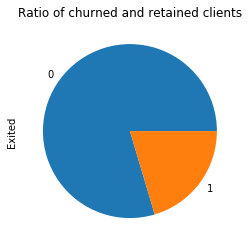

In [11]:
# check whether we have a class imbalance
class_ratio = df3['Exited'].value_counts(normalize=True)
print(class_ratio)
ax = df3['Exited'].value_counts().plot(kind='pie')
ax.set_title("Ratio of churned and retained clients");

Total number of clients in the dataset = 10000, which constitutes of: 
<br>o 79.61% retained clients ('Exited'=0)
<br>o 20.39% churned clients ('Exited'=1)

The two classes are almost in a ratio of 4:1, causing a class imbalance where the classes are not represented equally. The skewed class distribution will affect the learning of our models. 

We will try a few approaches, and choose performance metrics other than accuracy since judging our model quality in terms of accuracy will be misleading since the model will learn to favour the majority class in order to achieve a high score. The "accuracy" metric will then not reflect the model's performance but rather the underlying class proportion. 

**Univariate analysis of distribution and outliers (continuous variables)**

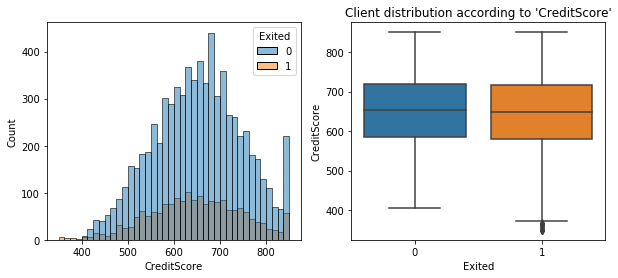

In [12]:
# draw a histogram and a boxplot with 'Exited' and 'CreditScore'
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(x="CreditScore", hue="Exited", data=df3, ax=ax[0])
sns.boxplot(x="Exited", y="CreditScore", data=df3, ax=ax[1]) 
plt.title("Client distribution according to 'CreditScore'")
plt.show();

In [13]:
df3[(df3['Exited']==1) & (df3['CreditScore']<350)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


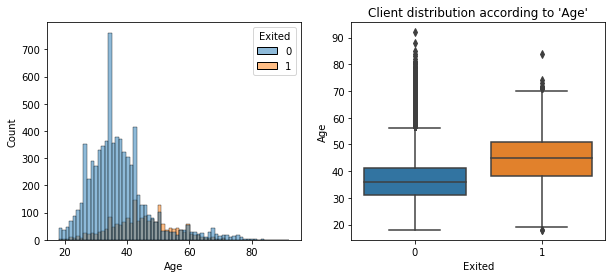

In [14]:
# draw a histogram and a boxplot with 'Exited' and 'Age'
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(x="Age", hue="Exited", data=df3, ax=ax[0])
sns.boxplot(x="Exited", y="Age", data=df3, ax=ax[1]) 
plt.title("Client distribution according to 'Age'")
plt.show();

* The distribution of the churned clients ('Exited'=1) is fairly Gaussian. Most churned clients are between the ages 40 and 50. Perhaps, they are at a stage in life where they are stable financially and are in a better position to negotiate with banks to get better conditions. Also, there are few clients above the age of 70. Maybe they are taking their savings and closing the account to start a second life in another country in their retirement. The data point below the minimum line is 'Age'=18, and it will not be treated as an outlier. 
* The distritbution of the retained clients ('Exited'=0) is right-skewed. Most clients are between the ages 30 and 40. There are few customers above the age of 80. The data points trail off above 'Age'=80, but let us not treat them as outliers or remove them. They can provide valuable information. 
* So we are keeping all the data points. 

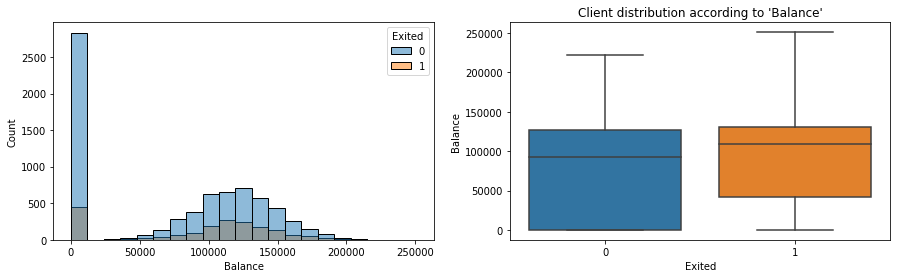

In [15]:
# draw a histogram and a boxplot with 'Exited' and 'Balance'
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(x="Balance", hue="Exited", data=df3, ax=ax[0])
sns.boxplot(x="Exited", y="Balance", data=df3, ax=ax[1]) 
plt.title("Client distribution according to 'Balance'")
plt.show();

* For the most part, both distributions are very Gaussian. 
* The churned clients ('Exited'=1) are in a higher range of 'Balance' values than the retained customers. 
* There is a very large count of clients around 'Balance'=0.

0.00         3283
130170.82       2
105473.74       2
136596.85       1
113755.78       1
Name: Balance, dtype: int64


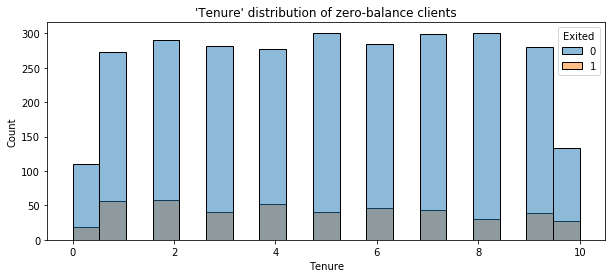

In [16]:
# check out the tall pillar around 'Balance'=0
print(df3['Balance'].value_counts().sort_values(ascending=False).head())

# check the 'Tenure' of the clients with 'Balance'=0
zero_balance = df3[df3['Balance']==0.0]
plt.figure(figsize=(10, 4))
sns.histplot(x="Tenure", hue="Exited", data=zero_balance)
plt.title("'Tenure' distribution of zero-balance clients")
plt.show();

* There are 3283 rows where 'Balance'=0.
* The vast majority have been with the bank for many years, so how come their balance is zero? This accounts for 36.11% of the entire dataset. They are too many to be mistakes. A quick consultation with Dr Google revealed that zero balance accounts (ZBA) are legitimate accounts:
```
A zero balance account is, as the name suggests, an account that has a permanent balance of zero. This is done by having the balance of the account “swept” into another account at the end of each business day. For this reason, the use of a zero balance account is also sometimes known as “sweeping.” The balance of the zero balance account is moved into a master account, and there may be multiple zero balance accounts (or sub-accounts) feeding into the same master account. If any money is needed by the ZBA, the precise amount can be transferred, which is then wired onwards once again, so the account remains at zero.
```
```
Zero balance accounts serve only to process payments. They cannot be used to hold long-term funds or gain interest.
```
```
Source: https://gocardless.com/guides/posts/what-is-zero-balance-account/
```
* From the histogram with 'Exited' and 'Balance' above, we can see that the clients with a zero balance account have a higher proportion of churning. 
* So there are no outliers and we are keeping all the data points. 

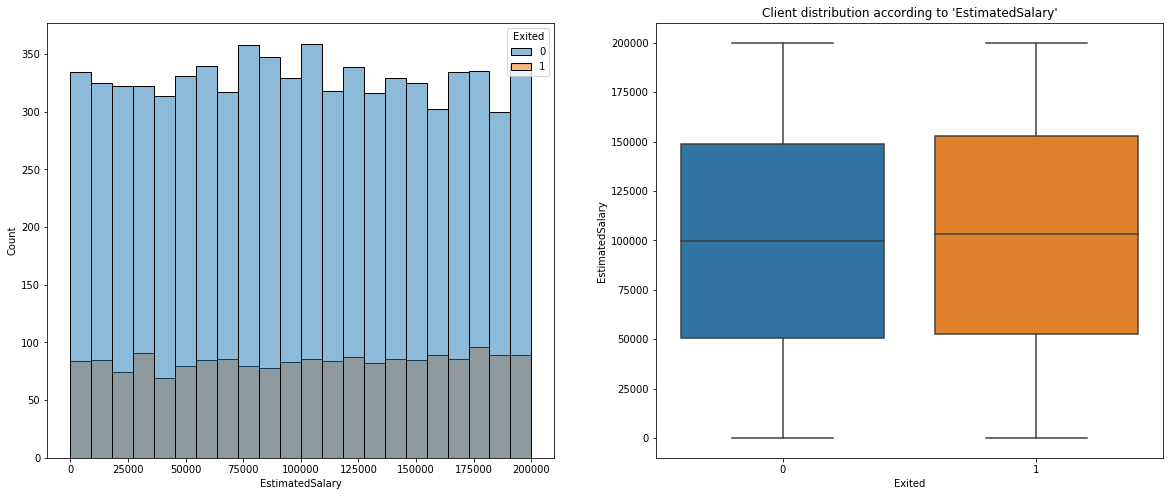

In [17]:
# draw a histogram and a boxplot with 'Exited' and 'EstimatedSalary'
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.histplot(x="EstimatedSalary", hue="Exited", data=df3, ax=ax[0])
sns.boxplot(x="Exited", y="EstimatedSalary", data=df3, ax=ax[1]) 
plt.title("Client distribution according to 'EstimatedSalary'")
plt.show();

* The two distributions are fairly uniform and are very similar.
* There are no outliers. 

**Univariate analysis of distribution (categorical variables)**

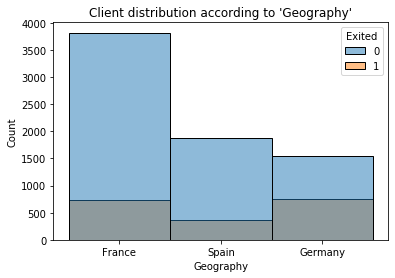

In [18]:
# draw a histogram with 'Exited' and 'Geography'
sns.histplot(x="Geography", hue="Exited", data=df3)
plt.title("Client distribution according to 'Geography'")
plt.show();

* Most clients are in France.
* Germany has the highest proportion of churned clients. 

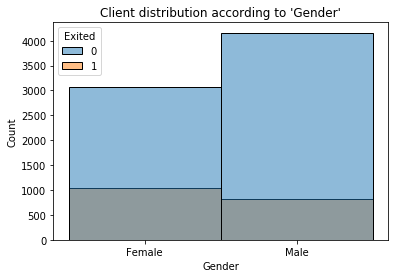

In [19]:
# draw a histogram with 'Exited' and 'Gender'
sns.histplot(x="Gender", hue="Exited", data=df3)
plt.title("Client distribution according to 'Gender'")
plt.show();

* Male clients exceed female clients by a third. 
* Female clients have a slightly higher churn rate than male clients.

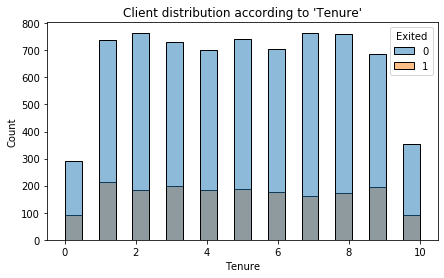

In [20]:
# draw a histogram with 'Exited' and 'Tenure'
plt.figure(figsize=(7,4))
sns.histplot(x="Tenure", hue="Exited", data=df3)
plt.title("Client distribution according to 'Tenure'")
plt.show();

* The distribution is fairly uniform for both classes. There are a very similar number of clients across the board except for 'Tenure'=0 and 10. 
* The proportion of churned clients is much higher for 'Tenure'=0 and 10.
* The low client count for 'Tenure'=0 may indicate that the bank is not attracting new clients. The low client count for 'Tenure'=10 may indicate that the bank is losing long-term clients who used to be loyal for years.

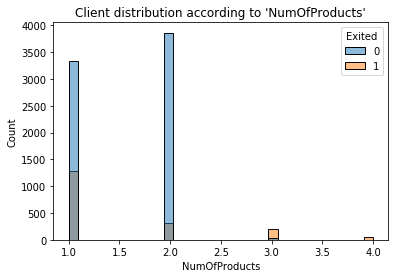

In [21]:
# draw a histogram with 'Exited' and 'NumOfProducts'
sns.histplot(x="NumOfProducts", hue="Exited", data=df3)
plt.title("Client distribution according to 'NumOfProducts'")
plt.show();

* The churned clients ('Exited'=1) purchased three and four financial products unlike the retained clients.
* Also, a much smaller proportion of the churned clients ('Exited'=1) purchased two financial products, compared to the retained clients. 

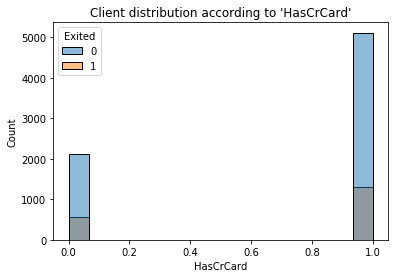

In [22]:
# draw a histogram with 'Exited' and 'HasCrCard'
sns.histplot(x="HasCrCard", hue="Exited", data=df3)
plt.title("Client distribution according to 'HasCrCard'")
plt.show();

* A larger proportion of the retained clients ('Exited'=0) carries the bank's credit card, compared to the churned clients. 

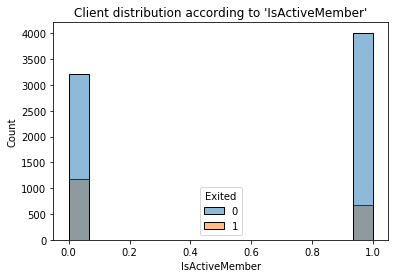

In [23]:
# draw a histogram with 'Exited' and 'IsActiveMember'
sns.histplot(x="IsActiveMember", hue="Exited", data=df3)
plt.title("Client distribution according to 'IsActiveMember'")
plt.show();

* A much smaller proportion of churned clients ('Exited'=1) were active in their bank account. 

### Conclusion

* Total number of observations: 10000
* 1 target: 'Exited' with 2 classes (Churned - 1, Not churned - 0) 
* 13 features: 'RowNumber', 'CustomerId' and 'Surname' will be removed from the dataset for machine learning sine they do not contribute any useful information.  


* No complete duplicates
* From this point on, will be working off a data slice without the missing values in 'Tenure'. The missing values accounted for 9.09% of the entire dataset.
* The dataset exhibits a class imbalance of 4:1 with retained clients being the majority and churned clients the minority. 
* No data points were removed as outliers.


* For both classes, the distribution of 'CreditScore', 'Age', 'Balance' are fairly Gaussian. 
* The distribution of 'EstimaterdSalary' and 'Tenure' are not quite Gaussian but fairly uniform across the board. 


* 'Balance'
<br>o Churned clients tend to hold more 'Balance' than retained customers.
<br>o Zero balance account (ZBA) holders are more likely to churn. ZBA holders account for 36.11% of the entire dataset. 
* 'Geography'
<br>o Client in Germany are more likely to churn than in France and Spain. (Most clients are in France).
* 'Gender'
<br>o Female clients are slightly more likely to churn than male clients. (Male clients exceed female clients by a third). 
* 'Tenure'
<br>o Clients with 'Tenure'=0 and 10 are slightly more likely to churn.
<br>o The low client count for 'Tenure'=0 may indicate that the bank is not attracting new clients. 
<br>o The low client count for 'Tenure'=10 may indicate that the bank is losing long-term clients who used to be loyal for years.
* 'NumOfProducts
<br>o Only churned clients had purchased three or four financial products.
<br>o Much less churned clients purchased two financial products than retained clients.
* 'HasCrCard'
<br>o Much less churned clients carried the bank's credit card than retained clients.
* 'IsActiveMember'
<br>o Much less churned clients were active in their bank account than retained clients.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Very thorough data exploration! Well done!

</div>

## Code Arsenal

In [24]:
# write a function that takes a model, a features dataset and a target dataset, and returns the ROC-AUC score
def calculate_roc_auc(model, f_set, t_set):
    pred_probas = model.predict_proba(f_set) 
    model_roc_auc_score = roc_auc_score(t_set, pred_probas[:, 1])
    return model_roc_auc_score

In [25]:
# write a function that takes a model, a features dataset and a target dataset, and returns the F1 score
def calculate_f1_score(model, f_set, t_set):
    pred = model.predict(f_set) 
    model_f1_score = f1_score(t_set, pred)
    return model_f1_score

In [26]:
# write a function that takes the source dataset and the name of the target variable, and
# splits into training, validation and test datasets in the specified proportions
def split_data(source, target_col, train_portion, valid_portion, stratify_bool):

        # separate the source dataset into features and target datasets
        features = source.drop([target_col], axis=1)
        target = source[target_col]    
        
        if stratify_bool == 0:
            # first split the features and target datasets into a training dataset and the "rest"...  
            features_train, features_valid_test, target_train, target_valid_test = \
            train_test_split(features, target, train_size=train_portion, random_state=12345, stratify=None)    

            # ...then the "rest" into validation and test datasets
            features_valid, features_test, target_valid, target_test = \
            train_test_split(features_valid_test, target_valid_test, train_size=valid_portion, random_state=12345, stratify=None)     

        else: # make sure the target distribution is equal in all three sets
            # first split the features and target datasets into a training dataset and the "rest"...  
            features_train, features_valid_test, target_train, target_valid_test = \
            train_test_split(features, target, train_size=train_portion, random_state=12345, stratify=target)    

            # ...then the "rest" into validation and test datasets
            features_valid, features_test, target_valid, target_test = \
            train_test_split(features_valid_test, target_valid_test, train_size=valid_portion, random_state=12345, stratify=target_valid_test)        
  
        # return all the datasets
        return features_train, target_train, features_valid, target_valid, features_test, target_test

## Feature Engineering

### Multicollinearity

Multicollinearity exists when one or more independent variables are highly correlated to each other. It adversely affects statistical learning models because the variables "work together" to produce an effect, which makes it unclear as to the degree of effect each individual variable has on the output. It decreases the interpretability of the model. 


Let us identify indepedent variables that are strongly correlated to each other at a glance using a dataset-wide scatter plots. 

In [27]:
# ...but first, perform label encoding on 'Gender' and 'Geography' in order to display correlations between variables
# purposefully not using OrdinalEncoder() here in order to preserve the original values of the variables that are already 
# numerical (e.g. 'EstimatedSalary'). The function converts them to ordinal values, thereby, altering them
df3_numeric = df3.copy()
df3_numeric['Gender'].replace({'Male':0, 'Female':1}, inplace=True)
df3_numeric['Geography'].replace({'France':0, 'Germany':1, 'Spain': 2}, inplace=True)
df3_numeric.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2.0,0.00,1,1,1,101348.88,1
1,608,2,1,41,1.0,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8.0,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1.0,0.00,2,0,0,93826.63,0
4,850,2,1,43,2.0,125510.82,1,1,1,79084.10,0


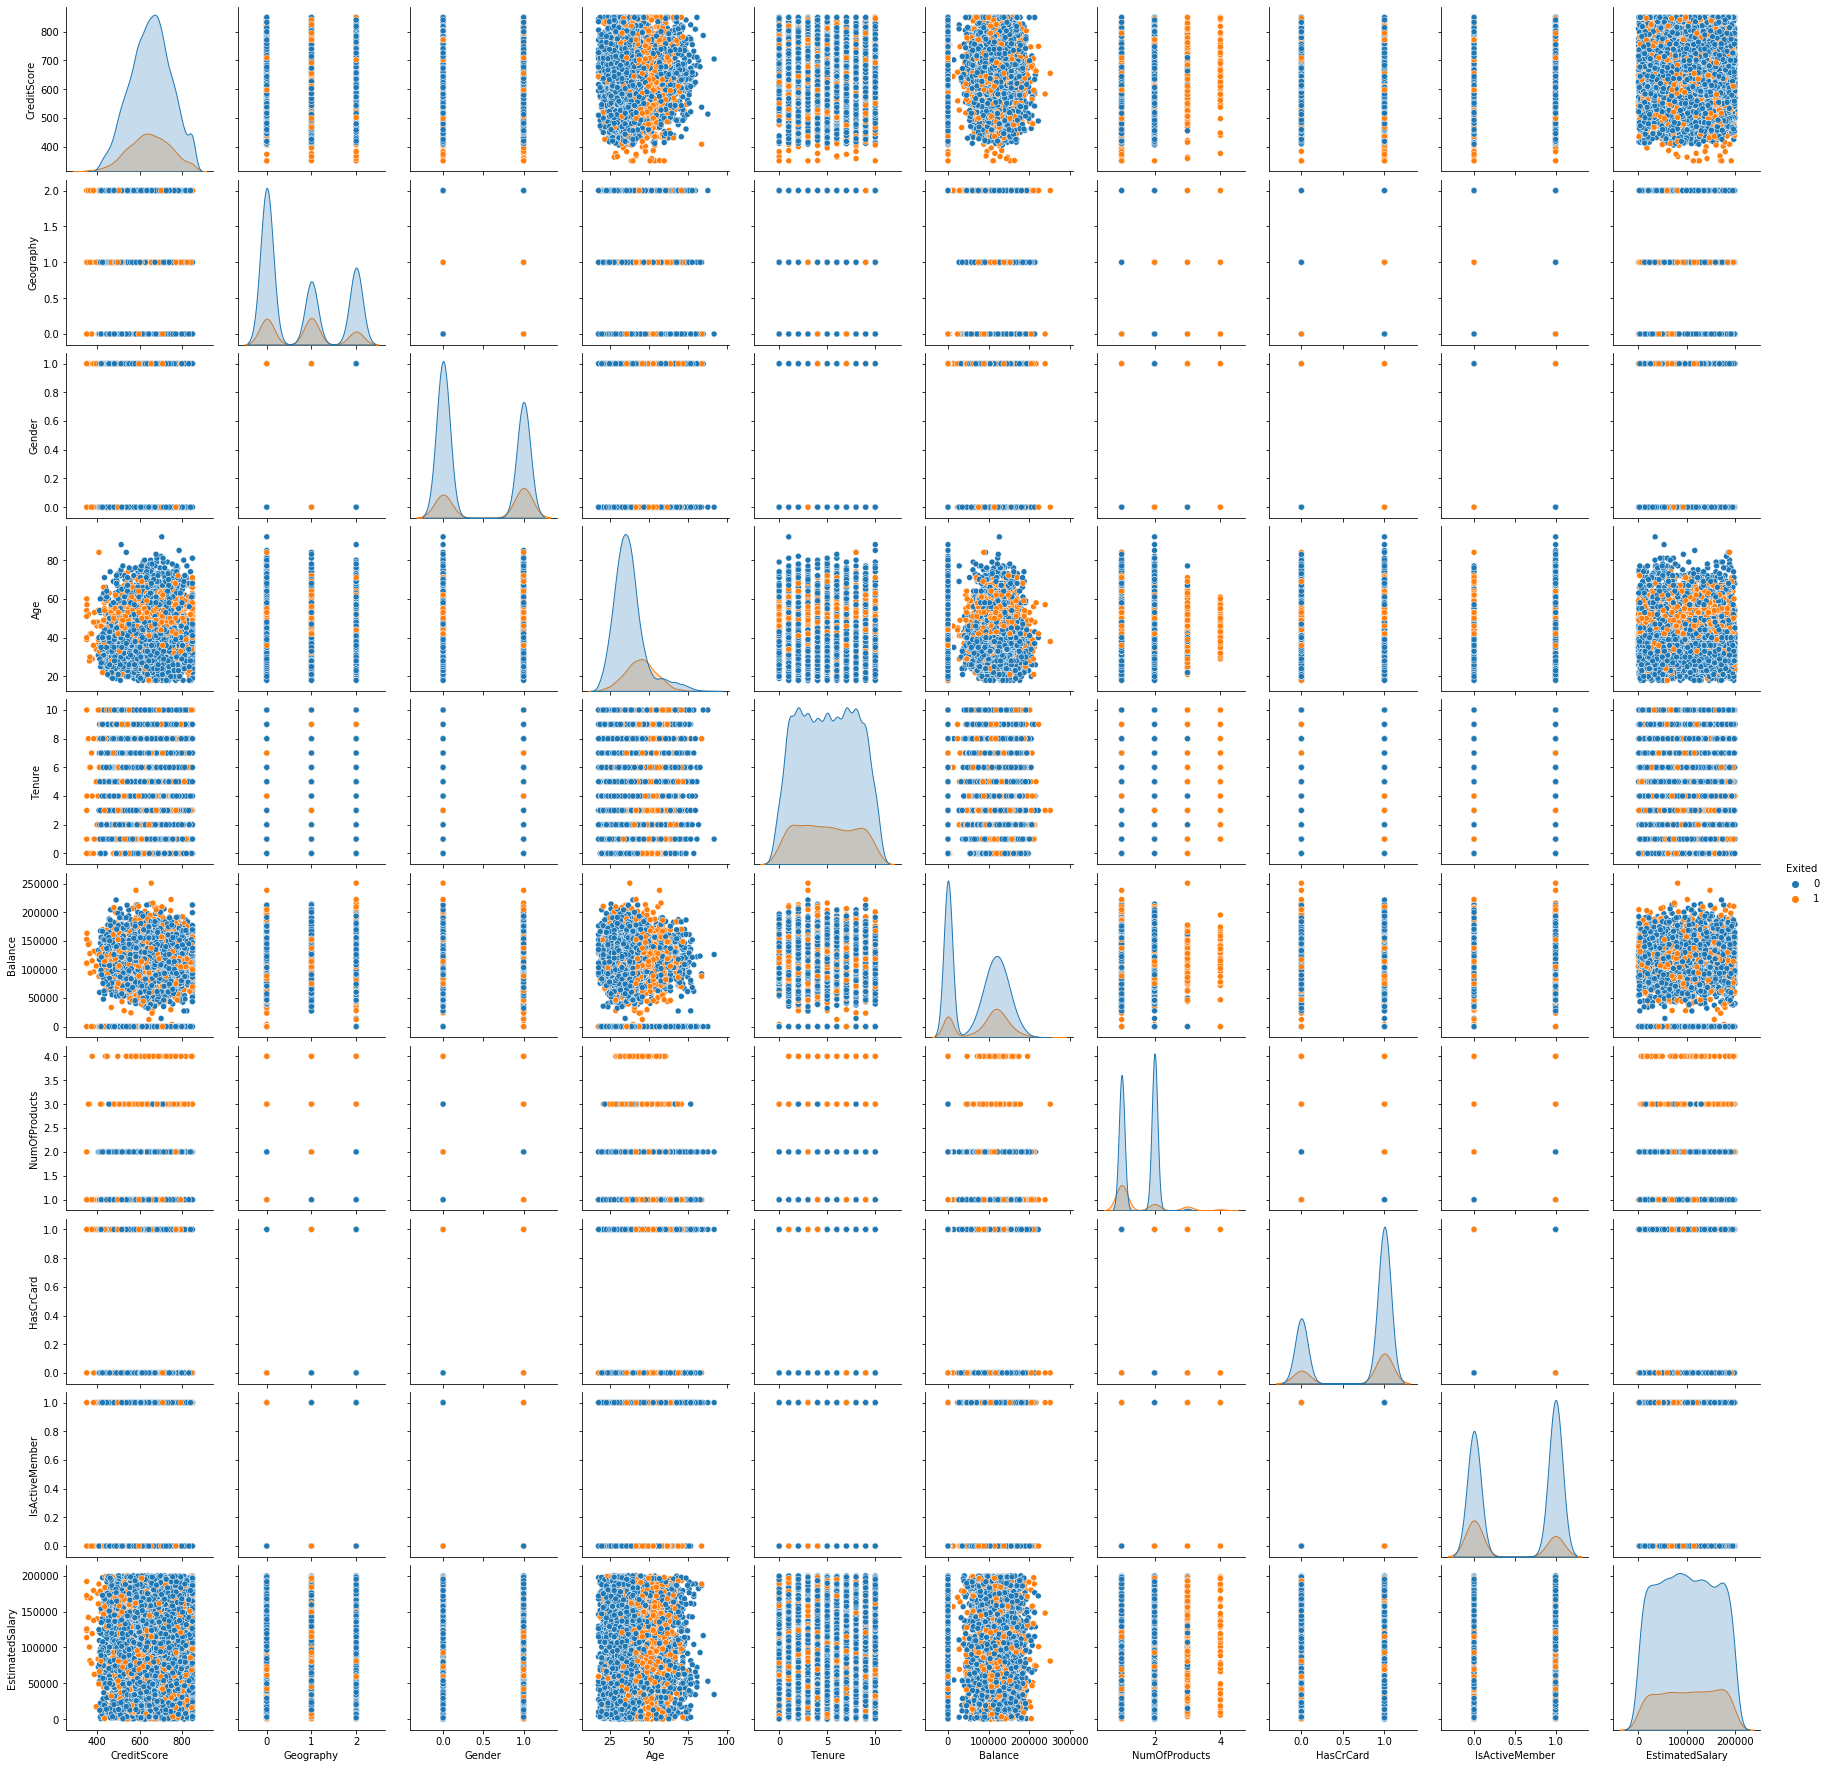

In [37]:
# draw the scatter plots
sns.pairplot(df3_numeric, hue='Exited')
plt.show();

* A strong correlation between two variables would be visible as a straight line cutting across a scatter plot diagonally. No such scatter plot is observed between any two features, meaning there is no multicollinearity between any pair of these variables and therefore we can keep all of them in that aspect. 

 ### Correlation between Features
 
Let us get a rough idea of the linear relationship between the features.

Seaborn's heatmap applies the Pearson correlation coefficients. The ranges of correlation strength between two features are defined as follows:
<br>o 0.9 to 1.0 (-0.9 to -1.0) - very high positive (negative) correlation
<br>o 0.7 to 0.9 (-0.7 to -0.9) - high positive (negative) correlation
<br>o 0.5 to 7.0 (-0.5 to -7.0) - moderate positive (negative) correlation
<br>o 0.3 to 0.5 (-0.3 to -0.5) - low positive (negative) correlation
<br>o 0.0 to 0.3 (-0.0 to -0.3) - negligible correlation

<div class="alert alert-info" role="alert">
Note to the Reviewer: I thought it would be more logical to normalise *all* the variables before generating the correlation matrix heatmap if I wanted to get an accurate view. 
    
<br>When I generated the heatmap after applying OrdinalEncoder() on the whole dataset, I saw the correlation coefficients were different than without applying the function. For instance, 'Gender' had a negative value when I used OrdinalEncoder(). 
    
<br>I found two schools of thought on the WWW: one says the Pearson's correlation coefficient calculation method takes normalization into account, and therefore there was no need to normalize "manually" before creating a heatmap; and another  says the opposite. 
    
<br>In the heatmap below, I used the absolute values of the variables. I only made sure all were numerical and nominal. 

<br>What would you advise?
</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>
    
Pearson correlation coefficient is not affected by linear transformations (standardization is a linear transformation: we just subtract the mean and divide by the standard deviation). You can confirm this yourself by using the formula for standardized variables and plugging it into the formula for pearson correlation coefficient.

Pearson correlation coefficient is completely meaningless when applied to data which is not numerical, ordinal or binary. What is the order between Spain, France and Germany? The mapping from a category that is not naturally ordinal to numbers is arbitrary. If we choose a different mapping, we will get a different correlation coefficient.
    
For binary features it does make sense, but if we swap 0 and 1 (for example, there is no natural order on 'Male', 'Female') the correlation coefficient's sign will flip.

</div>

<div class="alert alert-info" role="alert">
<b>Student's comment</b>

Yes, I noticed that the numeric labels that I had assigned were different from those assigned by OrdinalEncoder() - of course, that's why the correlation coefficients for 'Gender' flipped!
</div>

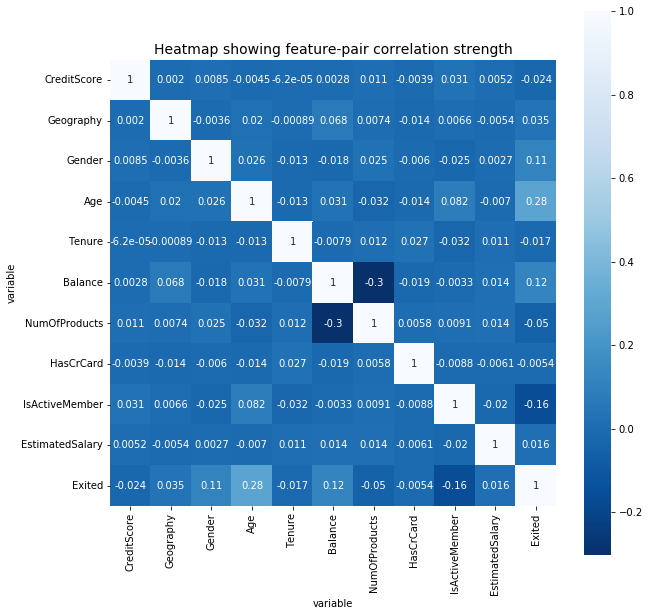

In [38]:
# draw up an inter-feature correlation heatmap
correlation = df3_numeric.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='Blues_r') # 
plt.title("Heatmap showing feature-pair correlation strength", fontsize=14)
plt.ylabel("variable")
plt.xlabel("variable");

* 'NumOfProducts' and 'Balance' show the strongest, though negative, correlation to each other. But on the scale of the Pearon correlation coefficient, the degree of the correlation is weak and does not warrant one of them to be removed. 
* 1) 'Age', 2) 'Balance', 3) 'Gender', 4) 'Geography' and 5) 'EstimatedSalary' show some degree of positive correlation with 'Exited' in that order of strength, though the degree of strength is negligible in all of them. 
* 1) 'IsActiveMember', 2) 'NumOfProducts', 3) 'CreditScore', 4) 'Tenure', 5)'HasCrCard' show some degree of negative correlation with 'Exited' in that order of strength, and all of them are negligibly small. 

Let us see if we can remove any of the variables that will not offer any useful information to our models learning how to tell the likelihood of a client churning.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Note that even 0 correlation doesn't tell us anything about independence of two random variables. Simple example: suppose $X$ is uniformly distributed on [0,1], and $Y = X^2$. $X$ and $Y$ have 0 correlation, even though $Y$ is completely determined by $X$. So I don't think it's a good idea to remove features based on correlation.

</div>

<div class="alert alert-info" role="alert">
<b>Student's comment</b>
    
I understand your explanation. As I was doing some more reading about how to see if a non-dichotomous categorical variable is correlated to a continuous variable, and I came across something called "Kruskal-Wallis test" (I will see if I can try that in another project). But I was glad to see that lots of people just settle for visualisation. :)
</div>

### Feature Selection

Feature selection is the process of reducing the number of input variables when developing a predictive model. It reduces the computational cost of modeling and reduces noise, improving the model's performance.

We already know that 'RowNumber', 'CustomerId' and 'Surname' should be removed since they do not add to the model's learning effort. 

We saw in the correlation matrix that all the numeric variables are very weakly correlated to our target variable. We will let our models use all of them as input variables to do their magic of predicting which client is more likely to churn.


<br>We also saw in the correlation matrix that 'HasCrCard' has an extremely low degree of correlation with our target variable. Let us now use the Chi-squared test on the categorical variables to see if we can drop 'HasCrCard' variable or any other ones. 

The goal of feature selection is to select the features which are highly dependent on the target variable, and to weed out those that only consume computational resource and do not contribute to learning. The Chi-squared test of independence is a statistical hypothesis test that determines whether two categorical variables are likely to be related or not. We can use the test when we have counts of values for any two given categorical variables.

When two features are independent, the observed count is close to the predicted count, indicated by a smaller Chi-Square 
value. Conversely, a high Chi-Square value indicates that the null hypothesis of independence is incorrect, i.e. higher the Chi-Square value, the feature is more dependent on the target variable and it can be selected for model training.


Our null hypothesis is that a feature and the 'Exited' variable are independent.
Our alternatie hypothesis is that the two variables are not independent. 

In [43]:
# perform label encoding in order to conduct the chi-squared test
encoder = OrdinalEncoder() 
df_ordinal = pd.DataFrame(encoder.fit_transform(df3), columns=df3.columns)
df_ordinal.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,226.0,0.0,0.0,24.0,2.0,0.0,0.0,1.0,1.0,4609.0,1.0
1,215.0,2.0,0.0,23.0,1.0,679.0,0.0,0.0,1.0,5119.0,0.0
2,109.0,0.0,0.0,24.0,8.0,5277.0,2.0,1.0,0.0,5182.0,1.0
3,306.0,0.0,0.0,21.0,1.0,0.0,1.0,0.0,0.0,4274.0,0.0
4,457.0,2.0,0.0,25.0,2.0,3374.0,0.0,1.0,1.0,3559.0,0.0


In [44]:
# perform the chi-squared test
X = df_ordinal[['Geography','Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']]
y = df_ordinal['Exited']
chi_scores = chi2(X, y) # the default value of alpha, 0.05, is used
chi_scores

(array([1.02840560e+01, 5.02242999e+01, 4.28186989e+00, 1.46258474e+01,
        7.85139557e-02, 1.05891221e+02]),
 array([1.34184652e-03, 1.37139045e-12, 3.85209486e-02, 1.31104011e-04,
        7.79321444e-01, 7.78959671e-25]))

In [45]:
# create a table to show the variable name, chi-squared value and p-value
feature_selection = pd.DataFrame(columns=['variable', 'chi_square', 'p_value'])
variables = ['Geography','Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
feature_selection['variable'] = variables
feature_selection['chi_square'] = chi_scores[0]
feature_selection['p_value'] = chi_scores[1].round(5)
feature_selection.sort_values(by='p_value', ascending=False)

,variable,chi_square,p_value
4,HasCrCard,0.078514,0.77932
2,Tenure,4.281870,0.03852
0,Geography,10.284056,0.00134
3,NumOfProducts,14.625847,0.00013
1,Gender,50.224300,0.00000
5,IsActiveMember,105.891221,0.00000


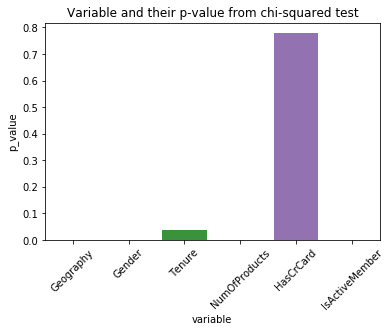

In [46]:
# plot a histogram for the p-values
sns.barplot(x="variable", y="p_value", data=feature_selection)
plt.title("Variable and their p-value from chi-squared test")
plt.xticks(rotation=45) 
plt.show();

* The Chi-squared value for 'HasCrCard' is the smallest of all the features in the table, yet its large p-value stands out like a sore thumb, and more importantly, is greater than alpha=0.05. We, therefore, cannot reject the null hypothesis, meaning that the variable is independent of 'Exited', our target variable. Since the variable will not help in predicting the the value of 'Exited' due to their super-weak correlation, we will be removing it from the dataset used for model training.
* We can also see that the others, especially, 'IsActiveMember', 'Gender', 'NumOfProducts', will help predict whether a client is likely to churn or not. 

In [47]:
# remove 'HasCrCard' from the dataset
df4 = df3.drop(['HasCrCard'], axis=1)
df4.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,79084.10,0


<div class="alert alert-info" role="alert">
Note to the Reviewer: following my note on the removal of 'RowNumber', 'CustomerId', 'Surname', I am removing 'HasCrCard' at this stage since once the dataset is split, it is extremely hard to tell which figure belongs to 'HasCrCard' in the array of training dataset. 
    
    
<br>Please let me know what the correct procedure is. 
</div>

<div class="alert alert-success">
<b>Reviewer's comment</b>

Yeah, it's fine

</div>

### One Hot Encoding

Predictive models determine the class using a formula consisting of numerical features. 

Let us transform the categorical features into numerical features using the One-Hot-Encoding technique. 

In [48]:
# specify drop_first=True to avoid the dummy feature trap
df_ohe = pd.get_dummies(df4, drop_first=True)
df_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,79084.10,0,0,1,0


<div class="alert alert-warning">
<b>Reviewer's comment</b>

Generally, it's best to apply one-hot encoding after splitting the data into train and test. `pd.get_dummies` won't work for this, because it might generate extra columns in the test set, which were not in the train set (suppose in the test set there are rows with `Geography == 'Italy'`, which were not in the train set). The better way is to use [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

</div>

<div class="alert alert-info" role="alert">
<b>Student's comment</b>

Good job you're telling me this - there was no mention of OneHotEncoder on the Platform...thank you.
    
I have to do OHE before feature scaling, so I have to do it after the dataset split but before feature scaling - got it. That means I will have to fit the OHE on the training dataset then apply the transformation to the validation and test datasets, and using OneHotEncoder will help me do that because it will have contingency dummy variables reserved for any new values that the model may encounter like `Geography == 'Italy'`.
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

>it will have contingency dummy variables reserved for any new values that the model may encounter like Geography == 'Italy'.
    
Hmm, actually OneHotEncoder unfortunately doesn't support this behavior: it can either throw an error or ignore values not seen in the train set. On the other hand, silently creating a feature that is a constant zero on the train set (what `pd.get_dummies` would do) is also not good.
  
</div>

### Feature Scaling

Feature Scaling is a technique for standardising the independent features into a fixed range. Learning algorithms look at the absolute values of variables: they do not take units into context and start "discovering" a significance where there is none. 

Feature scaling alleviates the highly varying magnitudes between numerical values among different features to prevent a learning algorithm from giving more weight, or importance, to numerically greater values than to smaller values. 

In [49]:
# look at the ranges of the features
df_ohe.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
count,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000
mean,650.736553,38.949181,4.997690,76522.740015,1.530195,0.515565,100181.214924,0.203938,0.252227,0.247278,0.547135
std,96.410471,10.555581,2.894723,62329.528576,0.581003,0.499785,57624.755647,0.402946,0.434315,0.431453,0.497801
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,51227.745000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97318.250000,1.000000,1.000000,100240.200000,0.000000,0.000000,0.000000,1.000000
75%,717.000000,44.000000,7.000000,127561.890000,2.000000,1.000000,149567.210000,0.000000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


We have 11 features and 7 different ranges. For instance, the magnitudes of values and dispersion are higher for  'EstimatedSalary' than for 'Age', which means that the algorithm will find the 'EstimatedSalary' feature to be more important than 'Age'. All features should be considered equally important before the algorithm's execution.

Let us centre the data at the mean and scale by the standard deviation to bring all the variables into a standard range. 

We are preprating two sets of training, validation and test datasets: one that takes class imbalance into account and one that does not (for posterity). 

**a) datasets that do not relate to the class imbalance (stratify=None)**

In [50]:
# prepare the training, validation and test datasets
train_segment = 0.6 # 1-0.6=0.4 is set aside for validation and test datasets combined
valid_segment = 0.5 # then split 50/50 the remaining 0.4 into validation and test datasets
stratify = 0
features_train, target_train, features_valid, target_valid, features_test, target_test = \
    split_data(df_ohe, 'Exited', train_segment, valid_segment, stratify)

# look at the sizes
print('training dataset:', features_train.shape[0], 'observations')
print('validation dataset:', features_valid.shape[0], 'observations')
print('test dataset:', features_test.shape[0], 'observations')

# make sure it all adds up to the correct total
print('raw data size:', df_ohe.shape[0])
print('datasets size total:', features_train.shape[0]+features_valid.shape[0]+features_test.shape[0])

training dataset: 5454 observations
validation dataset: 1818 observations
test dataset: 1819 observations
raw data size: 9091
datasets size total: 9091


In [51]:
# silence SettingWithCopyWarning that may arise from standardising features
pd.options.mode.chained_assignment = None

In [52]:
# create an instance of the class and tune it with the training dataset
scaler = StandardScaler()
scaler.fit(features_train) 

# the apply the transformation to the training, validation and test datasets
features_train_scaled = scaler.transform(features_train)
features_valid_scaled = scaler.transform(features_valid) 
features_test_scaled = scaler.transform(features_test)

In [53]:
# look at the class ratios
print('training dataset - churned:', target_train.value_counts()[1], ', retained:', target_train.value_counts()[0])
print('validation dataset - churned:', target_valid.value_counts()[1], ', retained:', target_valid.value_counts()[0])
print('test dataset - churned:', target_test.value_counts()[1], ', retained:', target_test.value_counts()[0])

features_train_scaled

training dataset - churned: 1126 , retained: 4328
validation dataset - churned: 377 , retained: 1441
test dataset - churned: 351 , retained: 1468


array([[ 0.8090755 , -1.03932669, -1.02599468, ..., -0.58229041,
        -0.57212783, -1.10730414],
       [-1.15251812, -1.22756099,  0.69652425, ..., -0.58229041,
        -0.57212783,  0.90309425],
       [-0.3988532 ,  0.09007912,  1.38553182, ..., -0.58229041,
        -0.57212783,  0.90309425],
       ...,
       [-1.04927635, -0.94520954,  0.35202046, ..., -0.58229041,
        -0.57212783, -1.10730414],
       [-0.95635876,  1.21948493,  1.38553182, ..., -0.58229041,
        -0.57212783, -1.10730414],
       [ 1.22204257, -1.50991244, -1.02599468, ...,  1.71735613,
        -0.57212783,  0.90309425]])

**b) datasets that take into account the class imbalance (stratify=<target variable>)**

<div class="alert alert-warning">
<b>Reviewer's comment</b>

The purpose of stratification is not to 'deal' with class imbalance. On the contrary, it makes sure that the imbalance present in the original dataset is preserved in each of the samples. As we would like the test set to be as representative of the true data distribution as possible, I don't see any reason not to use a stratified split. Although the class ratios in the two resulting splits are pretty similar in this particular case, so there is no reasonable distinction between them.

</div>

<div class="alert alert-info" role="alert">
<b>Student's comment</b>

Oh no, you misunderstand me - I was not trying to tackle the issue of class imbalance with the use of stratify parameter. My intention was to "explicitly relate" to the issue of class balance because of the second Project Instruction, "Train the model without taking into account the imbalance." So, I performed feature scaling, "ignoring" the class imbalance the first time (in (a) above), then I did it for the second time here with the stratify parameter. But as you say, the resulting splits were very similar so the effect of the parameter was less pronounced. 
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
  
Oh, okay, I see what you mean. But that line from project instruction just meant to first train the models without upsampling/downsampling/class weights/etc, and then with and to compare the results (which you did :)
  
</div>

In [54]:
# prepare the training, validation and test datasets
train_segment = 0.6 # 1-0.6=0.4 is set aside for validation and test datasets combined
valid_segment = 0.5 # then split 50/50 the remaining 0.4 into validation and test datasets
stratify = 1
features_train_s, target_train_s, features_valid_s, target_valid_s, features_test_s, target_test_s = \
    split_data(df_ohe, 'Exited', train_segment, valid_segment, stratify)

# look at the sizes
print('training dataset:', features_train_s.shape[0], 'observations')
print('validation dataset:', features_valid_s.shape[0], 'observations')
print('test dataset:', features_test_s.shape[0], 'observations')

# make sure it all adds up to the correct total
print('raw data size:', df_ohe.shape[0])
print('datasets size total:', features_train_s.shape[0]+features_valid_s.shape[0]+features_test_s.shape[0])

training dataset: 5454 observations
validation dataset: 1818 observations
test dataset: 1819 observations
raw data size: 9091
datasets size total: 9091


In [55]:
# skipping the SettingWithCopyWarning-silencing code below since it has already been run once
# pd.options.mode.chained_assignment = None

# create an instance of the class and tune it with the training dataset
scaler = StandardScaler()
scaler.fit(features_train_s) 

# the apply the transformation to the training, validation and test datasets
features_train_scaled_s = scaler.transform(features_train_s)
features_valid_scaled_s = scaler.transform(features_valid_s) 
features_test_scaled_s = scaler.transform(features_test_s)

In [56]:
# look at the class ratios
print('training dataset - churned:', target_train_s.value_counts()[1], ', retained:', target_train_s.value_counts()[0])
print('validation dataset - churned:', target_valid_s.value_counts()[1], ', retained:', target_valid_s.value_counts()[0])
print('test dataset - churned:', target_test_s.value_counts()[1], ', retained:', target_test_s.value_counts()[0])

training dataset - churned: 1112 , retained: 4342
validation dataset - churned: 371 , retained: 1447
test dataset - churned: 371 , retained: 1448


<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was split into train, validation and test. The proportions are reasonable. Scaling is applied correctly.

</div>

### Conclusion

* Multicollinearity and correlations between feature variables
<br>o There is no strong correlation between any two feature variables that suggests the risk of multicollinearity. 
<br>o As far as the heatmap is concerned, none of the feature variables has a sufficiently strong correlation with the target variable. 
<br>o features with some weak positive correlation to 'Exited': 1) 'Age', 2) 'Balance', 3) 'Gender', 4) Geography and 5) 'EstimatedSalary'
<br>o features with some negligible negative correlation to 'Exited': 1) 'IsActiveMember', 2) 'NumOfProducts', 3) 'CreditScore', 4) 'Tenure', 5)'HasCrCard'

* Feature selection
<br>o 'HasCrCard' has been excluded from the dataset 

## Sanity Check

**Sanity Check against chance**
This is a binary classification problem where a Megaline customer is using either a Smart or a Ultra plan. If the dataset were to contain an equal number of observations from the two classes (Smart and Ultra), then there will be a 50/50 chance of "guessing" the correct class of an observation, i.e. 0.5.

**The best constant model**
A dummy classifier is a type of classifier which does not generate any insight about the data and classifies the given data using only simple rules. It is used only as a simple baseline for the other classifiers i.e. any other classifier is expected to perform better on the given dataset.

Although we have an imbalanced dataset, and therefore it is tempting to set the strategy parameter to 'stratified' to generate predictions by respecting the training set’s class distribution, let us set the parameter to 'most_frequent' which always predicts the most frequent label in the training set and raise the hurdle.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Remember that our two metrics of interest in this project are F1 score and ROC-AUC, but you're only assessing accuracy for some reason. Judging by F1 score and ROC-AUC, this is not the best dummy model (you can try comparing it to other strategies if you'd like).

</div>

In [59]:
# create and train the model using the training dataset 
dummyclassifier_model = DummyClassifier(strategy='most_frequent', random_state=12345) 

# train the model
dummyclassifier_model.fit(features_train_scaled, target_train)

# find the predictions using validation set
dummy_pred = dummyclassifier_model.predict(features_valid_scaled)
dummy_pred_probas = dummyclassifier_model.predict_proba(features_valid_scaled) 

# evaluate the performance quality of the trained model on the validation dataset
# print out the accuracy , F1 score in the context of a confusion matrix as well as the AUC-ROC score
# evaluate the accuracy of the trained model's performance on the validation dataset
print('accuracy score:', dummyclassifier_model.score(features_valid_scaled, target_valid))
print(confusion_matrix(target_valid, dummy_pred))
print(classification_report(target_valid, dummy_pred))
print('f1 score:', f1_score(target_valid, dummy_pred))
# keep probabilities for the positive outcome only
dummy_roc_auc = roc_auc_score(target_valid, dummy_pred_probas[:, 1])
print('auc-roc score:', dummy_roc_auc)

accuracy score: 0.7926292629262927
[[1441    0]
 [ 377    0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1441
           1       0.00      0.00      0.00       377

    accuracy                           0.79      1818
   macro avg       0.40      0.50      0.44      1818
weighted avg       0.63      0.79      0.70      1818

f1 score: 0.0
auc-roc score: 0.5


All the models must exceed an F1 sore of 0.0 or an AUC-ROC score of 0.5. 

<div class="alert alert-info" role="alert">
<b>Student's comment</b>
    
Of course! Added the F1 and AUC-ROC scores.  
    
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
  
Ok! As you can see the dummy model with strategy='most_frequent' provides the lowest possible F1 score of 0 and AUC-ROC of 0.5, which is extremely easy to beat. Another student tried other strategies and 'uniform' got F1 = 0.28, ROC-AUC = 0.5, and constant=1 got F1 = 0.34, ROC-AUC = 0.5, both seem like a better baseline.
  
</div>

## Model Training - without taking class imbalance into account

We have a binary classification problem. We will create and compare the performance of the following models on the validation dataset after having trained them on the training dataset. Due to the project instruction, "Train the model without taking into account the imbalance first. ", we will first proceed to building models without taking the class imbalance into account. 

1.1) Decision tree binary classifier

1.2) Random forest binary classifier

1.3) Logistic regression classifier

After the training, the ultimate quality of the model's performance will be assessed in terms of F1 score and AUC-ROC metric against the test dataset. The model has to achieve the maximum possible F1 score, at least 0.59. The AUC-ROC score will also be measured as an additional evaluation metric and compared to the F1 score.

### Decision Tree

max_depth = 1 , training accuracy score: 0.7935460212687936 , validation accuracy score: 0.7926292629262927
max_depth = 2 , training accuracy score: 0.823982398239824 , validation accuracy score: 0.8305830583058306
max_depth = 3 , training accuracy score: 0.8406674000733406 , validation accuracy score: 0.8333333333333334
max_depth = 4 , training accuracy score: 0.8481848184818482 , validation accuracy score: 0.8509350935093509
max_depth = 5 , training accuracy score: 0.8553355335533553 , validation accuracy score: 0.856985698569857
max_depth = 6 , training accuracy score: 0.8652365236523653 , validation accuracy score: 0.8591859185918592
max_depth = 7 , training accuracy score: 0.8755042170883756 , validation accuracy score: 0.8536853685368537
max_depth = 8 , training accuracy score: 0.8892555922258892 , validation accuracy score: 0.8498349834983498
max_depth = 9 , training accuracy score: 0.9022735606894022 , validation accuracy score: 0.8388338833883389
max_depth = 10 , training accu

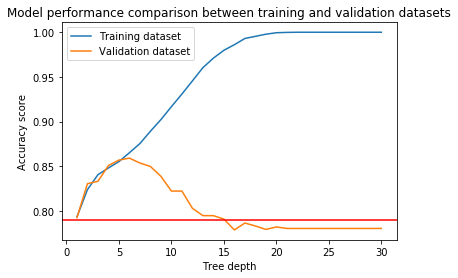

In [61]:
# find a ballpark depth value
max_depths = []
accuracy_train = []
accuracy_valid = []

for depth in range(1, 31): 
        # create a model, specifying max_depth
        decisiontree_model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 

        # train the model
        decisiontree_model.fit(features_train_scaled, target_train)

        # iterate to spot the best performing depth value on the training and validation datasets
        score_train = decisiontree_model.score(features_train_scaled, target_train)
        score_valid = decisiontree_model.score(features_valid_scaled, target_valid)
        max_depths.append(depth)
        accuracy_train.append(score_train)
        accuracy_valid.append(score_valid)
        
        # evaluate the accuracy of the trained model's performance on the validation dataset
        print("max_depth =", depth, ", ", end='')
        print('training accuracy score:', score_train, ', validation accuracy score:', score_valid)

# plot the accuracy scores of the model's performance on the training dataset and on the validation dataset
plt.plot(max_depths, accuracy_train, label='Training dataset')
plt.plot(max_depths, accuracy_valid, label='Validation dataset')
plt.axhline(y=0.79, color='r', linestyle='-')
plt.legend()
plt.title("Model performance comparison between training and validation datasets")
plt.ylabel("Accuracy score")
plt.xlabel("Tree depth")
plt.show()

Note: the red line marks the sanity check threshold score of 0.79.

The plots suggest that the model does not have a good fit on the problem.
* The model overfits to the training dataset after max_depth=22.
* The best accuracy score with the validation dataset peaks at 0.859 with max_depth=6, then deteriorates and plateaus thereafter.


Let us focus on the result with max_depth=6, calculate the evaluation metrics and experiment with the hyperparameters to see if the model performance can be improved.

In [119]:
# create a model, implicitly using the default setting of splitter='best'
decisiontree_model = DecisionTreeClassifier(random_state=12345, max_depth=6, criterion='gini') # 'gini' is better; # default setting of max_features, max_leaf_nodes is better

# train the model
decisiontree_model.fit(features_train_scaled, target_train)
        
# find the predictions using validation set
dectree_pred_valid = decisiontree_model.predict(features_valid_scaled) 
dectree_probas_valid = decisiontree_model.predict_proba(features_valid_scaled) 
        
# evaluate the performance quality of the trained model on the validation dataset
# print out the F1 score in the context of a confusion matrix as well as the AUC-ROC score
print(confusion_matrix(target_valid, dectree_pred_valid))
print(classification_report(target_valid, dectree_pred_valid))
print('f1 score:', f1_score(target_valid, dectree_pred_valid))
# keep probabilities for the positive outcome only
dectree_roc_auc = roc_auc_score(target_valid, dectree_probas_valid[:, 1])
print('auc-roc score:', dectree_roc_auc)

[[1398   43]
 [ 213  164]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1441
           1       0.79      0.44      0.56       377

    accuracy                           0.86      1818
   macro avg       0.83      0.70      0.74      1818
weighted avg       0.85      0.86      0.84      1818

f1 score: 0.5616438356164384
auc-roc score: 0.8501878484768719


Let us see if we can raise the model quality by cross validation.

In [120]:
%time
# create an instance of the model
decisiontree_model1 = DecisionTreeClassifier(random_state=12345) 

# define the parameters to optimise
# not selecting all the hyperparameters due to processing power limitations and computation time
params = {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': [3, 4, 5, 6, 7, 8],
          'min_samples_split': [2, 3, 4, 5],
          'min_samples_leaf': [1, 2, 3, 4],
          'min_impurity_decrease': [0.0, 0.1, 0.2]}

# choose a value of cv with which the number of observations in 'features_train_scaled' will be divisible (=5454 rows)
decisiontree_cv = GridSearchCV(estimator=decisiontree_model1, param_grid=params, cv=4, verbose=1, n_jobs=-1)
decisiontree_cv.fit(features_train_scaled, target_train)
print(decisiontree_cv.best_params_)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs
Fitting 4 folds for each of 1152 candidates, totalling 4608 fits
{'criterion': 'gini', 'max_depth': 7, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}


In reality, it took about one minute to excute GridSearchCV.

In [122]:
# create a model with the suggested combination of the hyperparameters
decisiontree_model1 = DecisionTreeClassifier(random_state=12345, criterion='gini', max_depth=7, splitter='random', \
                                             min_impurity_decrease=0.0, min_samples_split=2, min_samples_leaf=2) 

# train the model
decisiontree_model1.fit(features_train_scaled, target_train)
        
# find the predictions using validation set
dectree_pred_valid = decisiontree_model1.predict(features_valid_scaled) 
dectree_probas_valid = decisiontree_model1.predict_proba(features_valid_scaled) 
        
# evaluate the performance quality of the trained model on the validation dataset
# print out the F1 and AUC-ROC scores
print(confusion_matrix(target_valid, dectree_pred_valid))
print(classification_report(target_valid, dectree_pred_valid))
print('f1 score:', f1_score(target_valid, dectree_pred_valid))
# keep probabilities for the positive outcome only
dectree_roc_auc = roc_auc_score(target_valid, dectree_probas_valid[:, 1])
print('auc-roc score:', dectree_roc_auc)

[[1382   59]
 [ 198  179]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1441
           1       0.75      0.47      0.58       377

    accuracy                           0.86      1818
   macro avg       0.81      0.72      0.75      1818
weighted avg       0.85      0.86      0.85      1818

f1 score: 0.5821138211382113
auc-roc score: 0.8399854948946816


* The model is not achieving the f1 score threshold specified by the project of at least 0.59. In the classification report, we can see that the recall is low for the churned clients, i.e. the model is not very good at classifying 'Exited'=1 observations. This reflects the fact that we have yet to deal with the class imbalance. Also, we may have to move the classification threshold to decide what our acceptable false positive rate will be. 

* In contrast, the AUC-ROC score is pretty good. The AUC is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The high AUC means the algorithm does a good job at ranking the validation data, with most 'Exited'=0 majority class members at one end of a scale and 'Exited'=1 minority class members at the other. 

### Random Forest

n_estimators = 1 , training accuracy score: 0.9152915291529153 , validation accuracy score: 0.7684268426842684
n_estimators = 2 , training accuracy score: 0.920975430876421 , validation accuracy score: 0.8184818481848185
n_estimators = 3 , training accuracy score: 0.9616795012834617 , validation accuracy score: 0.8228822882288229
n_estimators = 4 , training accuracy score: 0.9574624129079574 , validation accuracy score: 0.8360836083608361
n_estimators = 5 , training accuracy score: 0.977997799779978 , validation accuracy score: 0.8377337733773378
n_estimators = 6 , training accuracy score: 0.971947194719472 , validation accuracy score: 0.8454345434543454
n_estimators = 7 , training accuracy score: 0.9864319765309865 , validation accuracy score: 0.847084708470847
n_estimators = 8 , training accuracy score: 0.98001466813348 , validation accuracy score: 0.8487348734873488
n_estimators = 9 , training accuracy score: 0.9877154382104877 , validation accuracy score: 0.847084708470847
n_estima

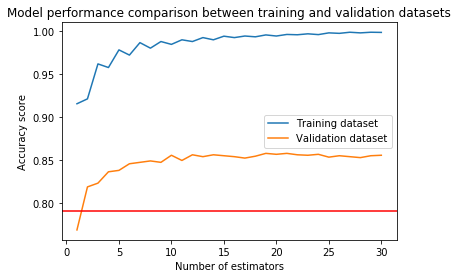

In [123]:
 # find a ballpark number of estimators
num_estimators = []
accuracy_train = []
accuracy_valid = []

for n_estimates in range(1, 31):
        # create a model, specifying n_estimators
        randomforest_model = RandomForestClassifier(random_state=12345, n_estimators=n_estimates) 

        # train the model 
        randomforest_model.fit(features_train_scaled, target_train) 

        # iterate to spot the best performing number of estimators on the training and validation datasets
        score_train = randomforest_model.score(features_train_scaled, target_train)
        score_valid = randomforest_model.score(features_valid_scaled, target_valid)
        num_estimators.append(n_estimates)
        accuracy_train.append(score_train)
        accuracy_valid.append(score_valid)
        
        # evaluate the accuracy of the trained model's performance on the validation dataset
        print("n_estimators =", n_estimates, ", ", end='')
        print('training accuracy score:', score_train, ', validation accuracy score:', score_valid)
        
# plot the accuracy scores of the model's performance on the training dataset and on the validation dataset
plt.plot(num_estimators, accuracy_train, label='Training dataset')
plt.plot(num_estimators, accuracy_valid, label='Validation dataset')
plt.axhline(y=0.79, color='r', linestyle='-')
plt.legend()
plt.title("Model performance comparison between training and validation datasets")
plt.ylabel("Accuracy score")
plt.xlabel("Number of estimators")
plt.show()

Note: the red line marks the sanity check threshold score of 0.79.

* The model starts to show a sign of being overfitted to the training dataset after n_estimators=30.
* The best accuracy score with the validation dataset peaks at 0.857 with n_estimators=19, then basically plateaus thereafter.

Let us focus on the result with n_estimators=19, calculate the evaluation metrics and experiment with the hyperparameters to see if the model performance can be improved.

In [124]:
# create a model
randomforest_model = RandomForestClassifier(random_state=12345, n_estimators=19, criterion='gini') # 'gini' is better; better not to touch max_depth, 

# train the model 
randomforest_model.fit(features_train_scaled, target_train) 
        
# find the predictions using validation set
randomforest_pred_valid = randomforest_model.predict(features_valid_scaled) 
randomforest_probas_valid = randomforest_model.predict_proba(features_valid_scaled) 
     
# evaluate the performance quality of the trained model on the validation dataset
# print out the F1 and AUC-ROC scores
print(confusion_matrix(target_valid, randomforest_pred_valid))
print(classification_report(target_valid, randomforest_pred_valid))
print('f1 score:', f1_score(target_valid, randomforest_pred_valid))
# keep probabilities for the positive outcome only
randomforest_roc_auc = roc_auc_score(target_valid, randomforest_probas_valid[:, 1])
print('auc-roc score:', randomforest_roc_auc)

[[1374   67]
 [ 192  185]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1441
           1       0.73      0.49      0.59       377

    accuracy                           0.86      1818
   macro avg       0.81      0.72      0.75      1818
weighted avg       0.85      0.86      0.85      1818

f1 score: 0.5882352941176471
auc-roc score: 0.8499816845434114


Let us see if we can raise the model quality by cross validation. 

In [125]:
%time
# create an instance of the model
randomforest_model1 = RandomForestClassifier(random_state=12345) 

# define the parameters to optimise
params = {'n_estimators': [17, 18, 19, 20, 21],
          'max_depth' : [5, 6, 7, 8],
          'criterion' :['gini', 'entropy'],
          'min_samples_split': [2, 3, 4, 5],
          'min_samples_leaf': [1, 2, 3, 4], 
          'min_impurity_decrease': [0.0, 0.1, 0.2]
         }

# choose a value of cv with which the number of observations in 'features_train_scaled' will be divisible (=5454 rows)
randomforest_cv = GridSearchCV(estimator=randomforest_model1, param_grid=params, cv=4, verbose=1, n_jobs=-1)
randomforest_cv.fit(features_train_scaled, target_train)
print(randomforest_cv.best_params_)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
Fitting 4 folds for each of 1920 candidates, totalling 7680 fits
{'criterion': 'gini', 'max_depth': 7, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 21}


In reality, it took about 3 minutes to execute GridSearchCV.

In [126]:
# create a model with the suggested combination of the hyperparameters
randomforest_model1 = RandomForestClassifier(random_state=12345, n_estimators=21, max_depth=7, criterion='gini', \
                                             min_samples_split=5, min_samples_leaf=1, min_impurity_decrease=0.0)

# train the model 
randomforest_model1.fit(features_train_scaled, target_train) 

# find the predictions using validation set
randomforest_pred_valid = randomforest_model1.predict(features_valid_scaled)
randomforest_probas_valid = randomforest_model1.predict_proba(features_valid_scaled)
    
# evaluate the performance quality of the trained model on the validation dataset
# print out the F1 and AUC-ROC scores
print(confusion_matrix(target_valid, randomforest_pred_valid))
print(classification_report(target_valid, randomforest_pred_valid))
print('f1 score:', f1_score(target_valid, randomforest_pred_valid))
# keep probabilities for the positive outcome only
randomforest_roc_auc = roc_auc_score(target_valid, randomforest_probas_valid[:, 1])
print('auc-roc score:', randomforest_roc_auc)

[[1400   41]
 [ 213  164]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1441
           1       0.80      0.44      0.56       377

    accuracy                           0.86      1818
   macro avg       0.83      0.70      0.74      1818
weighted avg       0.85      0.86      0.84      1818

f1 score: 0.563573883161512
auc-roc score: 0.8677384736874076


* The model is performing worse than the decision tree classifier. 

* Again, the AUC-ROC score is pretty good. 

### Logistic Regression

In [127]:
# create and train the model using the training dataset with 'liblinear' solver
logisticregression_model = LogisticRegression(random_state=12345, solver='liblinear') 

# train the model 
logisticregression_model.fit(features_train_scaled, target_train) 

# find the predictions using validation set
logreg_pred_valid = logisticregression_model.predict(features_valid_scaled)         
logreg_probas_valid = logisticregression_model.predict_proba(features_valid_scaled)

# evaluate the performance quality of the trained model on the validation dataset
# print out the F1 and AUC-ROC scores
print(confusion_matrix(target_valid, logreg_pred_valid))
print(classification_report(target_valid, logreg_pred_valid))
print('f1 score:', f1_score(target_valid, logreg_pred_valid))
# keep probabilities for the positive outcome only
logreg_roc_auc = roc_auc_score(target_valid, logreg_probas_valid[:, 1])
print('auc-roc score:', logreg_roc_auc)

[[1394   47]
 [ 300   77]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1441
           1       0.62      0.20      0.31       377

    accuracy                           0.81      1818
   macro avg       0.72      0.59      0.60      1818
weighted avg       0.78      0.81      0.77      1818

f1 score: 0.3073852295409182
auc-roc score: 0.7734221556279993


The F1 score is pretty bad. Let us see if we can raise the model quality by cross validation.

In [128]:
%time
# create an instance of the model
logisticregression_model1 = LogisticRegression(random_state=12345) 

# define the parameters to optimise
params = { 
        'solver': ['liblinear', 'newton-cg', 'sag', 'lbfgs', 'saga'],
        'penalty': ['l2', 'l1', 'elasticnet', 'none'],
        'C': [0.1, 0.5, 1.0],
        'fit_intercept': [True, False],
        'intercept_scaling': [0.0, 0.5, 1.0],
        'max_iter': [50, 100, 200],
        'multi_class': ['auto', 'ovr', 'multinomial']}

# choose a value of cv with which the number of observations in 'features_train_scaled' will be divisible (=5454 rows)
logisticregression_cv = GridSearchCV(estimator=logisticregression_model1, param_grid=params, cv=4, verbose=1, n_jobs=-1)
logisticregression_cv.fit(features_train_scaled, target_train)
print(logisticregression_cv.best_params_)

Fitting 4 folds for each of 3240 candidates, totalling 12960 fits
{'C': 0.1, 'fit_intercept': True, 'intercept_scaling': 0.0, 'max_iter': 50, 'multi_class': 'auto', 'penalty': 'none', 'solver': 'newton-cg'}


In reality, it took about 8 minutes to execute GridSearchCV.

In [129]:
# create and train the model with the suggested combination of hyperparameters
logisticregression_model1 = LogisticRegression(random_state=12345, solver='newton-cg', penalty='none', C=0.1, \
                                            fit_intercept=True, intercept_scaling=0.0, max_iter=50, multi_class='auto') 

# train the model 
logisticregression_model1.fit(features_train_scaled, target_train) 
        
# find the predictions using validation set
logreg_pred_valid = logisticregression_model1.predict(features_valid_scaled)         
logreg_probas_valid = logisticregression_model1.predict_proba(features_valid_scaled)

# print out the confusion matrix, precision, recall, F1 score and support
print(confusion_matrix(target_valid, logreg_pred_valid))
print(classification_report(target_valid, logreg_pred_valid))
print('f1 score:', f1_score(target_valid, logreg_pred_valid))
# keep probabilities for the positive outcome only
logreg_roc_auc = roc_auc_score(target_valid, logreg_probas_valid[:, 1])
print('auc-roc score:', logreg_roc_auc)

[[1394   47]
 [ 300   77]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1441
           1       0.62      0.20      0.31       377

    accuracy                           0.81      1818
   macro avg       0.72      0.59      0.60      1818
weighted avg       0.78      0.81      0.77      1818

f1 score: 0.3073852295409182
auc-roc score: 0.7734000666351285


* Absolutely no improvement in the performance. 

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Great, you trained and evaluated three different models without taking class imbalance into account. You also tuned their hyperparameters using a cross-validated grid search! One question: why are you tuning hyperparameters based on accuracy? That's not the metric we're interested in. You can use F1 score directly!

</div>

<div class="alert alert-info" role="alert">
<b>Student's comment</b>
Though the dummy classifier sanity check threshold was incorrectly measured in terms of accuracy, I was outputting the F1 and AUC-ROC scores only for each model, and was trying to improve those. 
    
Now that I have added the F1 and AUC-ROC scores to the sanity check section, is it OK?
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
  
It's great that you added the measurement of F1 and AUC-ROC for the dummy classifier, but this comment was about something different. I was specifically talking about the hyperparameter tuning loops and GridSearchCV. There you are optimizing the model's hyperparameters using some metric. For example you are training a random forest with different number of trees and evaluating the model on the validation set using some metric, and then select the hyperparameter values that resulted in the best metric value. But! The hyperparameters that give the best accuracy are not necessarily the same hyperparameters that give the best F1 score. So my point is, if our main metric on the project is F1 score, why not calculate it in the hyperparameter tuning loop instead of accuracy? Same applies to GridSearchCV: there is a `scoring` parameter that specifies what metric to optimize (there are quite a few [predefined metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) in scikit-learn, but you can also create your own if what you need is not there).
  
</div>

## Model Quality Improvement - taking class imbalance into account

There are several approaches to compensate for the class imbalance.

1. class_weight hyperparameter - we can set the hyperparameter in the classifiers to indicate that the models must take the class imbalance into account when learning from the dataset
1. Stratified datasets - we can use the training, validation and test datasets that had been split with an equal target distribution
1. Upsampling - we can increase the number of observations in the minority class to have an equal proportion of the two classes in the dataset
1. Downsampling - we can decrease the number of observations in the majority class to have an equal proportion of the two classes in the dataset
1. Threshold moving - Logistic Regression classifier gives the probability that an observation belongs to the positive class. We can then adjust the classification threshold, which is 0.5 by default, so more true positives will make it through the threshold and be counted! This comes hand in hand with a lower tolerance level towards the false positives, leading to an increase in the False Positive Rate (FPR). There is a tradeoff between maximizing our TPR and minimizing our FPR. 
1. Use other learning algorithms which are known to perform well with imbalanced datasets such as Bagging, Ensemble, AdaBoost and KNN classifiers. 


We will take the instance of the model that showed the best performance among all the attempts, and try \#1, 2, 3, 5 and 6 incrementally to see whether we can improve the F1 score.

Note: I am skipping \#4. Downsampling in this project since I tried it in the last project using NearMiss version 3 and saw that the models produced better results when the training dataset was bigger. A dataset of 10000 observations (strictly speaking, 9091) is not big enough to be downsampled. 

### class_weight Hyperparameter

**Decision tree binary classification**

In [130]:
# create a model
decisiontree_model2 = DecisionTreeClassifier(random_state=12345, max_depth=6, criterion='gini', class_weight='balanced')
# train the model
decisiontree_model2.fit(features_train_scaled, target_train)
        
# find the predictions using validation set
dectree_pred_valid = decisiontree_model2.predict(features_valid_scaled) 
dectree_probas_valid = decisiontree_model2.predict_proba(features_valid_scaled) 
        
# evaluate the performance quality of the trained model on the validation dataset
# print out the F1 and AUC-ROC scores
print(confusion_matrix(target_valid, dectree_pred_valid))
print(classification_report(target_valid, dectree_pred_valid))
print('f1 score:', f1_score(target_valid, dectree_pred_valid))
# keep probabilities for the positive outcome only
dectree_roc_auc = roc_auc_score(target_valid, dectree_probas_valid[:, 1])
print('auc-roc score:', dectree_roc_auc)

[[1055  386]
 [  78  299]]
              precision    recall  f1-score   support

           0       0.93      0.73      0.82      1441
           1       0.44      0.79      0.56       377

    accuracy                           0.74      1818
   macro avg       0.68      0.76      0.69      1818
weighted avg       0.83      0.74      0.77      1818

f1 score: 0.5630885122410546
auc-roc score: 0.8320960429410021


**Random forest binary classification**

In [131]:
# create a model
randomforest_model2 = RandomForestClassifier(random_state=12345, n_estimators=19, criterion='gini', class_weight='balanced')

# train the model 
randomforest_model2.fit(features_train_scaled, target_train) 
        
# find the predictions using validation set
randomforest_pred_valid = randomforest_model2.predict(features_valid_scaled) 
randomforest_probas_valid = randomforest_model2.predict_proba(features_valid_scaled) 
     
# evaluate the performance quality of the trained model on the validation dataset
# print out the F1 and AUC-ROC scores
print(confusion_matrix(target_valid, randomforest_pred_valid))
print(classification_report(target_valid, randomforest_pred_valid))
print('f1 score:', f1_score(target_valid, randomforest_pred_valid))
# keep probabilities for the positive outcome only
randomforest_roc_auc = roc_auc_score(target_valid, randomforest_probas_valid[:, 1])
print('auc-roc score:', randomforest_roc_auc)

[[1380   61]
 [ 203  174]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1441
           1       0.74      0.46      0.57       377

    accuracy                           0.85      1818
   macro avg       0.81      0.71      0.74      1818
weighted avg       0.84      0.85      0.84      1818

f1 score: 0.5686274509803921
auc-roc score: 0.8417719421931056


**Logistic Regression**

In [132]:
# create and train the model
logisticregression_model2 = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced') 

# train the model 
logisticregression_model2.fit(features_train_scaled, target_train) 

# find the predictions using validation set
logreg_pred_valid = logisticregression_model2.predict(features_valid_scaled)         
logreg_probas_valid = logisticregression_model2.predict_proba(features_valid_scaled)

# evaluate the performance quality of the trained model on the validation dataset
# print out the F1 and AUC-ROC scores
print(confusion_matrix(target_valid, logreg_pred_valid))
print(classification_report(target_valid, logreg_pred_valid))
print('f1 score:', f1_score(target_valid, logreg_pred_valid))
# keep probabilities for the positive outcome only
logreg_roc_auc = roc_auc_score(target_valid, logreg_probas_valid[:, 1])
print('auc-roc score:', logreg_roc_auc)

[[1013  428]
 [ 104  273]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1441
           1       0.39      0.72      0.51       377

    accuracy                           0.71      1818
   macro avg       0.65      0.71      0.65      1818
weighted avg       0.80      0.71      0.73      1818

f1 score: 0.5064935064935064
auc-roc score: 0.7778454764503725


* None of the models achieved 0.59 in the F2 score.
* The Logistic Regression classifier benefitted the most from the use of class_weight hyperparameter. Its F1 score jumped from 0.307 to 0.506 as well as the AUC-ROC score from 0.773 to 0.778.

### Stratified Datasets

**Decision tree binary classification**

In [133]:
# create a model
decisiontree_model4 = DecisionTreeClassifier(random_state=12345, max_depth=6, criterion='gini', class_weight='balanced')
# train the model
decisiontree_model4.fit(features_train_scaled_s, target_train_s)
        
# find the predictions using validation set
dectree_pred_valid = decisiontree_model4.predict(features_valid_scaled_s) 
dectree_probas_valid = decisiontree_model4.predict_proba(features_valid_scaled_s) 
        
# evaluate the performance quality of the trained model on the validation dataset
# print out the F1 and AUC-ROC scores
print(confusion_matrix(target_valid_s, dectree_pred_valid))
print(classification_report(target_valid_s, dectree_pred_valid))
print('f1 score:', f1_score(target_valid_s, dectree_pred_valid))
# keep probabilities for the positive outcome only
dectree_roc_auc = roc_auc_score(target_valid_s, dectree_probas_valid[:, 1])
print('auc-roc score:', dectree_roc_auc)

[[1105  342]
 [  78  293]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1447
           1       0.46      0.79      0.58       371

    accuracy                           0.77      1818
   macro avg       0.70      0.78      0.71      1818
weighted avg       0.84      0.77      0.79      1818

f1 score: 0.5825049701789264
auc-roc score: 0.8366189364741998


**Random forest binary classification**

In [134]:
# create a model
randomforest_model4 = RandomForestClassifier(random_state=12345, n_estimators=19, criterion='gini', class_weight='balanced')

# train the model 
randomforest_model4.fit(features_train_scaled_s, target_train_s) 
        
# find the predictions using validation set
randomforest_pred_valid = randomforest_model4.predict(features_valid_scaled_s) 
randomforest_probas_valid = randomforest_model4.predict_proba(features_valid_scaled_s) 
     
# evaluate the performance quality of the trained model on the validation dataset
# print out the F1 and AUC-ROC scores
print(confusion_matrix(target_valid_s, randomforest_pred_valid))
print(classification_report(target_valid_s, randomforest_pred_valid))
print('f1 score:', f1_score(target_valid_s, randomforest_pred_valid))
# keep probabilities for the positive outcome only
randomforest_roc_auc = roc_auc_score(target_valid_s, randomforest_probas_valid[:, 1])
print('auc-roc score:', randomforest_roc_auc)

[[1398   49]
 [ 198  173]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1447
           1       0.78      0.47      0.58       371

    accuracy                           0.86      1818
   macro avg       0.83      0.72      0.75      1818
weighted avg       0.86      0.86      0.85      1818

f1 score: 0.5834738617200675
auc-roc score: 0.8499544554492331


**Logistic Regression**

In [135]:
# create and train the model
logisticregression_model5 = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced') 

# train the model 
logisticregression_model5.fit(features_train_scaled_s, target_train_s) 

# find the predictions using validation set
logreg_pred_valid = logisticregression_model5.predict(features_valid_scaled_s)         
logreg_probas_valid = logisticregression_model5.predict_proba(features_valid_scaled_s)

# evaluate the performance quality of the trained model on the validation dataset
# print out the F1 and AUC-ROC scores
print(confusion_matrix(target_valid_s, logreg_pred_valid))
print(classification_report(target_valid_s, logreg_pred_valid))
print('f1 score:', f1_score(target_valid_s, logreg_pred_valid))
# keep probabilities for the positive outcome only
logreg_roc_auc = roc_auc_score(target_valid_s, logreg_probas_valid[:, 1])
print('auc-roc score:', logreg_roc_auc)

[[1025  422]
 [ 101  270]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1447
           1       0.39      0.73      0.51       371

    accuracy                           0.71      1818
   macro avg       0.65      0.72      0.65      1818
weighted avg       0.80      0.71      0.74      1818

f1 score: 0.5079962370649106
auc-roc score: 0.790862030746763


* There is a little improvement in both the F1 and the AUC-ROC scores in all three classifiers, the least in the Logistic Regression model. 

<div class="alert alert-warning">
<b>Reviewer's comment</b>

As mentioned earlier, stratification is not a method of dealing with class imbalance.

</div>

<div class="alert alert-info" role="alert">
<b>Student's comment</b>

I understand. My intention was to relate to the issue of class imbalance as required by the second Project Instruction. 
</div>

### Upsampling

Not specifying class_weight='balanced' since the upsampled datasets have an equal proportion of the two classes. Specifying the hyperparameter will have no effect on the output. It will only be a burden on the computational resource. 

In [136]:
# create an instance
upsample = SMOTE(random_state=12345)
# transform the dataset
features_train_scaled_up, target_train_up = upsample.fit_resample(features_train_scaled, target_train)

# look at the sizes
print('upsampled training dataset:', features_train_scaled_up.shape[0], 'observations')

upsampled training dataset: 8656 observations


In [137]:
# check the ratio of churned and retained clients before upsampling
print('number of churned clients before downsampling:', target_train.value_counts()[0])
print('number of retained clients before downsampling:', target_train.value_counts()[1])

number of churned clients before downsampling: 4328
number of retained clients before downsampling: 1126


In [138]:
# check the ratio of churned and retained clients after upsampling
print('number of churned clients after downsampling:', target_train_up.value_counts()[0])
print('number of retained clients after downsampling:', target_train_up.value_counts()[1])

number of churned clients after downsampling: 4328
number of retained clients after downsampling: 4328


<div class="alert alert-success">
<b>Reviewer's comment</b>

Upsampling was applied correctly

</div>

**Decision tree binary classification**

In [139]:
# create a model
decisiontree_model3 = DecisionTreeClassifier(random_state=12345, max_depth=6, criterion='gini')

# train the model with the upsampled training dataset
decisiontree_model3.fit(features_train_scaled_up, target_train_up)
        
# find the predictions using validation set
dectree_pred_valid = decisiontree_model3.predict(features_valid_scaled) 
dectree_probas_valid = decisiontree_model3.predict_proba(features_valid_scaled) 
        
# evaluate the performance quality of the trained model on the validation dataset
# print out the F1 and AUC-ROC scores
print(confusion_matrix(target_valid, dectree_pred_valid))
print(classification_report(target_valid, dectree_pred_valid))
print('f1 score:', f1_score(target_valid, dectree_pred_valid))
# keep probabilities for the positive outcome only
dectree_roc_auc = roc_auc_score(target_valid, dectree_probas_valid[:, 1])
print('auc-roc score:', dectree_roc_auc)

[[1202  239]
 [ 115  262]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1441
           1       0.52      0.69      0.60       377

    accuracy                           0.81      1818
   macro avg       0.72      0.76      0.73      1818
weighted avg       0.83      0.81      0.81      1818

f1 score: 0.5968109339407746
auc-roc score: 0.8429306939441185


**Random forest binary classification**

In [140]:
# create a model
randomforest_model3 = RandomForestClassifier(random_state=12345, n_estimators=19, criterion='gini')

# train the model with the upsampled training dataset
randomforest_model3.fit(features_train_scaled_up, target_train_up) 
        
# find the predictions using validation set
randomforest_pred_valid = randomforest_model3.predict(features_valid_scaled) 
randomforest_probas_valid = randomforest_model3.predict_proba(features_valid_scaled) 
     
# evaluate the performance quality of the trained model on the validation dataset
# print out the F1 and AUC-ROC scores
print(confusion_matrix(target_valid, randomforest_pred_valid))
print(classification_report(target_valid, randomforest_pred_valid))
print('f1 score:', f1_score(target_valid, randomforest_pred_valid))
# keep probabilities for the positive outcome only
randomforest_roc_auc = roc_auc_score(target_valid, randomforest_probas_valid[:, 1])
print('auc-roc score:', randomforest_roc_auc)

[[1279  162]
 [ 139  238]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1441
           1       0.59      0.63      0.61       377

    accuracy                           0.83      1818
   macro avg       0.75      0.76      0.75      1818
weighted avg       0.84      0.83      0.84      1818

f1 score: 0.6126126126126126
auc-roc score: 0.8576539280671946


**Logistic Regression**

In [141]:
# create and train the model using the training dataset with 'liblinear' solver
logisticregression_model3 = LogisticRegression(random_state=12345, solver='liblinear') 

# train the model 
logisticregression_model3.fit(features_train_scaled_up, target_train_up) 

# find the predictions using validation set
logreg_pred_valid = logisticregression_model3.predict(features_valid_scaled)         
logreg_probas_valid = logisticregression_model3.predict_proba(features_valid_scaled)

# evaluate the performance quality of the trained model on the validation dataset
# print out the F1 and AUC-ROC scores
print(confusion_matrix(target_valid, logreg_pred_valid))
print(classification_report(target_valid, logreg_pred_valid))
print('f1 score:', f1_score(target_valid, logreg_pred_valid))
# keep probabilities for the positive outcome only
logreg_roc_auc = roc_auc_score(target_valid, logreg_probas_valid[:, 1])
print('auc-roc score:', logreg_roc_auc)

[[1012  429]
 [ 110  267]]
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1441
           1       0.38      0.71      0.50       377

    accuracy                           0.70      1818
   macro avg       0.64      0.71      0.64      1818
weighted avg       0.79      0.70      0.73      1818

f1 score: 0.49767008387698053
auc-roc score: 0.7769048535039587


**KNN**

In [142]:
# create a model
knn_model2 = KNeighborsClassifier(n_neighbors=5)

# train the model 
knn_model2.fit(features_train_scaled_up, target_train_up) 
        
# find the predictions using validation set
knn_pred_valid = knn_model2.predict(features_valid_scaled) 
knn_probas_valid = knn_model2.predict_proba(features_valid_scaled) 
     
# evaluate the performance quality of the trained model on the validation dataset
# print out the F1 and AUC-ROC scores
print(confusion_matrix(target_valid, knn_pred_valid))
print(classification_report(target_valid, knn_pred_valid))
print('f1 score:', f1_score(target_valid, knn_pred_valid))
# keep probabilities for the positive outcome only
knn_roc_auc = roc_auc_score(target_valid, knn_probas_valid[:, 1])
print('auc-roc score:', knn_roc_auc)

[[1099  342]
 [ 116  261]]
              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1441
           1       0.43      0.69      0.53       377

    accuracy                           0.75      1818
   macro avg       0.67      0.73      0.68      1818
weighted avg       0.81      0.75      0.77      1818

f1 score: 0.5326530612244897
auc-roc score: 0.7951319541211619


**Bagging**

In [143]:
# create a model, specifying n_estimators
bagging_model2 = BaggingClassifier(random_state=12345, base_estimator=RandomForestClassifier()) 

# train the model 
bagging_model2.fit(features_train_scaled_up, target_train_up) 

# find the predictions using validation set
bagging_pred_valid = bagging_model2.predict(features_valid_scaled)         
bagging_probas_valid = bagging_model2.predict_proba(features_valid_scaled) 
    
# evaluate the performance quality of the trained model on the validation dataset
# print out the F1 and AUC-ROC scores
print(confusion_matrix(target_valid, bagging_pred_valid))
print(classification_report(target_valid, bagging_pred_valid))
print('f1 score:', f1_score(target_valid, bagging_pred_valid))
# keep probabilities for the positive outcome only
bagging_roc_auc = roc_auc_score(target_valid, bagging_probas_valid[:, 1])
print('auc-roc score:', bagging_roc_auc)

[[1275  166]
 [ 132  245]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1441
           1       0.60      0.65      0.62       377

    accuracy                           0.84      1818
   macro avg       0.75      0.77      0.76      1818
weighted avg       0.84      0.84      0.84      1818

f1 score: 0.6218274111675127
auc-roc score: 0.8654522629252821


**AdaBoost**

In [144]:
# create a model
adaboost_model2 = AdaBoostClassifier(random_state=12345) # n_estimators=50 by default

# train the model 
adaboost_model2.fit(features_train_scaled_up, target_train_up) 
        
# find the predictions using validation set
adaboost_pred_valid = adaboost_model2.predict(features_valid_scaled) 
adaboost_probas_valid = adaboost_model2.predict_proba(features_valid_scaled) 
     
# evaluate the performance quality of the trained model on the validation dataset
# print out the F1 and AUC-ROC scores
print(confusion_matrix(target_valid, adaboost_pred_valid))
print(classification_report(target_valid, adaboost_pred_valid))
print('f1 score:', f1_score(target_valid, adaboost_pred_valid))
# keep probabilities for the positive outcome only
adaboost_roc_auc = roc_auc_score(target_valid, adaboost_probas_valid[:, 1])
print('auc-roc score:', adaboost_roc_auc)

[[1182  259]
 [  98  279]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1441
           1       0.52      0.74      0.61       377

    accuracy                           0.80      1818
   macro avg       0.72      0.78      0.74      1818
weighted avg       0.84      0.80      0.82      1818

f1 score: 0.6098360655737705
auc-roc score: 0.8436936845728633


* The Bagging and AdaBoost classifiers finally achieved the project requirement of reaching the minimum F1 score of 0.59 and exceeding it. 
* Upsampling did it for many of the classifiers, though did not help much in others. In general, models seem to be able to learn more accurately when there is a lot of data.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

I can see some new models appeared in this section that were not present in the previous, so we can't really tell if the method of dealing with class imbalance had any effect on them.

</div>

<div class="alert alert-info" role="alert">
<b>Student's comment</b>

Yes, I'm sorry, that was not very scientific...when I saw that none of the "classic" models was rising to the occasion, I started adding the "less conventional" models just to get the result...;op I will do it more methodically next time.

</div>

### Threshold Moving (Logistic Regression)

Of the few possible approaches that there are, we will focus on achieving an optimal threshold for the Precision-Recall Curve. Unlike the ROC Curve, a precision-recall curve focuses on the performance of a classifier on the 'Exited'=1 minority class only since our goal is to reach 0.59 in the F1 score.

[[1012  429]
 [ 110  267]]
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1441
           1       0.38      0.71      0.50       377

    accuracy                           0.70      1818
   macro avg       0.64      0.71      0.64      1818
weighted avg       0.79      0.70      0.73      1818

f1 score: 0.49767008387698053
Best Threshold=0.540921, G-Mean=0.718


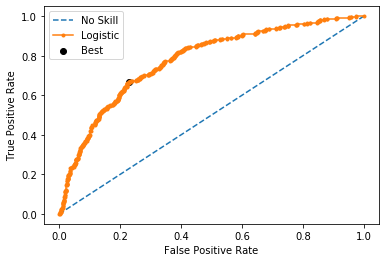

In [145]:
# create and train the model using the training dataset with 'liblinear' solver
logisticregression_model4 = LogisticRegression(random_state=12345, solver='liblinear') 

# train the model 
logisticregression_model4.fit(features_train_scaled_up, target_train_up) 

# find the predictions using validation set
logreg_pred_valid = logisticregression_model4.predict(features_valid_scaled)         
logreg_probas_valid = logisticregression_model4.predict_proba(features_valid_scaled)

# evaluate the performance quality of the trained model on the validation dataset
# print out the F1 and AUC-ROC scores
print(confusion_matrix(target_valid, logreg_pred_valid))
print(classification_report(target_valid, logreg_pred_valid))
print('f1 score:', f1_score(target_valid, logreg_pred_valid))
# keep probabilities for the positive outcome only
fpr, tpr, thresholds = roc_curve(target_valid, logreg_probas_valid[:, 1])

# calculate the g-mean for each threshold
# g-mean is a metric for imbalanced classification that, if optimized, will seek a balance between 
# the sensitivity and the specificity.
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

* The best threshold is 0.54. Such a threshold is only slightly better than a guess. 

<div class="alert alert-warning">
<b>Reviewer's comment</b>

>The best threshold is 0.54. Such a threshold is only slightly better than a guess.
    
I don't understand your point. What does a threshold value have to do with guesses?
    
Varying the threshold can change the F1 score, but I don't see why optimizing G-mean corrseponds to optimizing the F1 score.

</div>

<div class="alert alert-info" role="alert">
<b>Student's comment</b>

OK, so here I had a problem. On the Platform, the topic of moving the threshold was mentioned, but it did not explain how to do it. The above was my attempt at trying to understand one reference I managed to find on the WWW. 

    
I understand the concept of "moving the goal post" to allow more TPs to make it through the threshold at the risk of allowing more FPs. 
    
    
Could you please point me to a site that explains the concept fully, including how exactly to move the threshold for a model?
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
  
There's nothing mysterious about it really. The idea is that the method `predict_proba` of many models that support it gives you a 'probability' that an example is of class 0 or 1: the `[:, 1]` bit just selects the second column that has probabilities for 1. But as ultimately, in binary classfication context, we need the binary value: 0 or 1. So how do we get it from some probability value $p$? We compare it to some threshold $a \in (0,1)$. If $p > a$ we assign the example to class 1. That's pretty much it. Every point on the ROC curve corresponds to some threshold value: the lower left corner point corresponds to threshold equal to 0 (then we have 0 positive predictions and so both true positive rate and false positive rate are also 0), and the upper right — to threshold equal to 1.
    
The precision-recall curve is constructed similarly, but instead of TPR and FPR, the x and y values are recall and precision. Then you can select the threshold based on the precision or recall requirements in your particular case (sometimes one metric is more important, sometimes the other, but generally you don't way either to be too low, or your classifier will degenerate to a dummy constant classifier).
    
In general, there is no ultimate best threshold value, it depends on what metric you want to optimize. [This article](https://towardsdatascience.com/optimal-threshold-for-imbalanced-classification-5884e870c293) seems to have various different methods of threshold tuning, and in paricular it contains a section about threshold tuning for optimal F1 score.
  
</div>

### Other Classifiers

Since the Bagging and Easy Ensemble classifier were tried in the last project, let us try the Adaboost and KNN classifiers here as well.

<div class="alert alert-info" role="alert">
I always have trouble installing the Imblearn library to use the Easy Ensemble classifier. I see on the WWW that many people do. 
</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Hmm, I haven't seen any issues with installing it on the platform, at least.

</div>

<div class="alert alert-info" role="alert">
<b>Student's comment</b>

Restarting the kernel helps sometimes and sometimes doesn't...
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
  
Sorry, don't know how to help, as I never encountered it, but if you experience it again, you can probably contact tech support
  
</div>

**AdaBoost Ensemble Classifier for binary classification**

AdaBoost is effective at boosting the performance of decision trees on binary classification problems.

Boosting is a general ensemble method that creates a strong classifier from a number of weak classifiers. First, a model is built from the training data, then a second model is created which tries to correct the errors in the first model. Thus models are added until the training dataset is predicted perfectly or a maximum number of models are added.

We will first test the classifer on the raw data, complete with the class imbalance. 

n_estimators = 1 , training accuracy score: 0.7935460212687936 , validation accuracy score: 0.7926292629262927
n_estimators = 2 , training accuracy score: 0.8146314631463146 , validation accuracy score: 0.8201320132013201
n_estimators = 3 , training accuracy score: 0.8221488815548221 , validation accuracy score: 0.8223322332233224
n_estimators = 4 , training accuracy score: 0.845984598459846 , validation accuracy score: 0.847084708470847
n_estimators = 5 , training accuracy score: 0.8483681701503484 , validation accuracy score: 0.8498349834983498
n_estimators = 6 , training accuracy score: 0.8472680601393473 , validation accuracy score: 0.8492849284928493
n_estimators = 7 , training accuracy score: 0.8461679501283461 , validation accuracy score: 0.8498349834983498
n_estimators = 8 , training accuracy score: 0.8491015768243491 , validation accuracy score: 0.8525852585258525
n_estimators = 9 , training accuracy score: 0.8503850385038504 , validation accuracy score: 0.8531353135313532
n_e

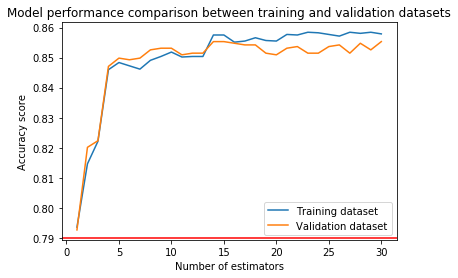

In [146]:
# find a ballpark number of estimators
num_estimators = []
accuracy_train = []
accuracy_valid = []

for n_estimates in range(1, 31):
        # create a model, specifying n_estimators
        adaboost_model = AdaBoostClassifier(random_state=12345, n_estimators=n_estimates) 

        # train the model 
        adaboost_model.fit(features_train_scaled, target_train) 

        # iterate to spot the best performing number of estimators on the training and validation datasets
        score_train = adaboost_model.score(features_train_scaled, target_train)
        score_valid = adaboost_model.score(features_valid_scaled, target_valid)
        num_estimators.append(n_estimates)
        accuracy_train.append(score_train)
        accuracy_valid.append(score_valid)
        
        # evaluate the accuracy of the trained model's performance on the validation dataset
        print("n_estimators =", n_estimates, ", ", end='')
        print('training accuracy score:', score_train, ', validation accuracy score:', score_valid)
        
# plot the accuracy scores of the model's performance on the training dataset and on the validation dataset
plt.plot(num_estimators, accuracy_train, label='Training dataset')
plt.plot(num_estimators, accuracy_valid, label='Validation dataset')
plt.axhline(y=0.79, color='r', linestyle='-')
plt.legend()
plt.title("Model performance comparison between training and validation datasets")
plt.ylabel("Accuracy score")
plt.xlabel("Number of estimators")
plt.show()

Note: the red line marks the sanity check threshold score of 0.79.

* The plots suggest that the model has a good fit on the problem.
* The model shows a steep learning curve until around 0.85 then starts overfitting to the training dataset after n_estimators=10 though it does not reache the accuracy score of 1.0.
* The best accuracy score with the validation dataset continues to grow after 0.85 though more gradually. 

Let us focus on the result with n_estimators=14 which achieves the validation accuracy score of 0.855, the maximum in the list above. We will calculate the evaluation metrics and experiment with the hyperparameters to see if the model performance can be improved.

In [149]:
# create a model
adaboost_model = AdaBoostClassifier(random_state=12345) # n_estimators=50 by default

# train the model 
adaboost_model.fit(features_train_scaled, target_train) 
        
# find the predictions using validation set
adaboost_pred_valid = adaboost_model.predict(features_valid_scaled) 
adaboost_probas_valid = adaboost_model.predict_proba(features_valid_scaled) 
     
# evaluate the performance quality of the trained model on the validation dataset
# print out the F1 and AUC-ROC scores
print(confusion_matrix(target_valid, adaboost_pred_valid))
print(classification_report(target_valid, adaboost_pred_valid))
print('f1 score:', f1_score(target_valid, adaboost_pred_valid))
# keep probabilities for the positive outcome only
adaboost_roc_auc = roc_auc_score(target_valid, adaboost_probas_valid[:, 1])
print('auc-roc score:', adaboost_roc_auc)

[[1362   79]
 [ 194  183]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1441
           1       0.70      0.49      0.57       377

    accuracy                           0.85      1818
   macro avg       0.79      0.72      0.74      1818
weighted avg       0.84      0.85      0.84      1818

f1 score: 0.5727699530516432
auc-roc score: 0.8450954152454547


In [150]:
%time
# create an instance of the model
adaboost_model = AdaBoostClassifier(random_state=12345) # the default base_estimator is DecisionTreeClassifier

# define the parameters to optimise
params = {'n_estimators': [50, 70, 100],
          'learning_rate' :[1.0, 2.0],
          'algorithm': ['SAMME', 'SAMME.R']
         }

# choose a value of cv with which the number of observations in 'features_train_scaled' will be divisible (=5454 rows)
adaboost_cv = GridSearchCV(estimator=adaboost_model, param_grid=params, cv=4, verbose=1, n_jobs=-1)
adaboost_cv.fit(features_train_scaled, target_train)
print(adaboost_cv.best_params_)

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 7.87 µs
Fitting 4 folds for each of 12 candidates, totalling 48 fits
{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 50}


* In realitiy, it took about 10 seconds to execute GridSearchCV.
* GridSearchCV agrees with the manual trial and error that the default setting is the best. 

**KNN Classifier**

Imbalanced classes are not a problem at all for the k-nearest neighbour algorithm. It is not influenced in any way by the size of the class, and therefore, it will not favour any class on the basis of size.

n_neighbors = [1] , training accuracy score: 1.0 , validation accuracy score: 0.8025302530253026
n_neighbors = [1, 2] , training accuracy score: 0.8887055372203887 , validation accuracy score: 0.8278327832783279
n_neighbors = [1, 2, 3] , training accuracy score: 0.894939493949395 , validation accuracy score: 0.8355335533553355
n_neighbors = [1, 2, 3, 4] , training accuracy score: 0.87000366703337 , validation accuracy score: 0.8311331133113311
n_neighbors = [1, 2, 3, 4, 5] , training accuracy score: 0.8766043270993766 , validation accuracy score: 0.8366336633663366
n_neighbors = [1, 2, 3, 4, 5, 6] , training accuracy score: 0.8588192152548588 , validation accuracy score: 0.834983498349835
n_neighbors = [1, 2, 3, 4, 5, 6, 7] , training accuracy score: 0.8641364136413642 , validation accuracy score: 0.8338833883388339
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8] , training accuracy score: 0.8546021268793546 , validation accuracy score: 0.8228822882288229
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 

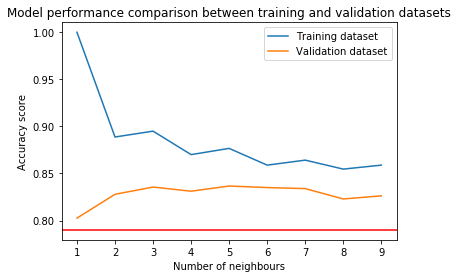

In [151]:
# find a ballpark number of estimators
num_totoro = []
accuracy_train = []
accuracy_valid = []

for num_neighbours in range(1, 10):
        # create a model, specifying n_neighbors
        knn_model = KNeighborsClassifier(n_neighbors=num_neighbours) 

        # train the model 
        knn_model.fit(features_train_scaled, target_train) 

        # iterate to spot the best performing number of estimators on the training and validation datasets
        score_train = knn_model.score(features_train_scaled, target_train)
        score_valid = knn_model.score(features_valid_scaled, target_valid)
        num_totoro.append(num_neighbours)
        accuracy_train.append(score_train)
        accuracy_valid.append(score_valid)
        
        # evaluate the accuracy of the trained model's performance on the validation dataset
        print("n_neighbors =", num_totoro, ", ", end='')
        print('training accuracy score:', score_train, ', validation accuracy score:', score_valid)
        
# plot the accuracy scores of the model's performance on the training dataset and on the validation dataset
plt.plot(num_totoro, accuracy_train, label='Training dataset')
plt.plot(num_totoro, accuracy_valid, label='Validation dataset')
plt.axhline(y=0.79, color='r', linestyle='-')
plt.legend()
plt.title("Model performance comparison between training and validation datasets")
plt.ylabel("Accuracy score")
plt.xlabel("Number of neighbours")
plt.show()

Note: the red line marks the sanity check threshold score of 0.79.

* There is a high variance between the training and validation accuracy scores at first, but they start to converge and run along in parallel. 
* The model shows a perfect score right at the beginning with n_neighbors=1.0, and follows a downward trend from then on. 
* The best accuracy score with the validation dataset peaks at 0.836 with n_neighors=5, the default value.  

Let us focus on the result with n_neighbors=5 which achieves the validation accuracy score of 0.836, the maximum in the list above. We will calculate the evaluation metrics and experiment with the hyperparameters to see if the model performance can be improved.

In [152]:
# create a model
knn_model = KNeighborsClassifier(n_neighbors=5)

# train the model 
knn_model.fit(features_train_scaled, target_train) 
        
# find the predictions using validation set
knn_pred_valid = knn_model.predict(features_valid_scaled) 
knn_probas_valid = knn_model.predict_proba(features_valid_scaled) 
     
# evaluate the performance quality of the trained model on the validation dataset
# print out the F1 and AUC-ROC scores
print(confusion_matrix(target_valid, knn_pred_valid))
print(classification_report(target_valid, knn_pred_valid))
print('f1 score:', f1_score(target_valid, knn_pred_valid))
# keep probabilities for the positive outcome only
knn_roc_auc = roc_auc_score(target_valid, knn_probas_valid[:, 1])
print('auc-roc score:', knn_roc_auc)

[[1366   75]
 [ 222  155]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1441
           1       0.67      0.41      0.51       377

    accuracy                           0.84      1818
   macro avg       0.77      0.68      0.71      1818
weighted avg       0.82      0.84      0.82      1818

f1 score: 0.5107084019769357
auc-roc score: 0.802985511461426


In [153]:
%time
# create an instance of the model
knn_model1 = KNeighborsClassifier()

# define the parameters to optimise
params = {'n_neighbors': [1, 5, 10],
          'weights': ['uniform', 'distance'],
          'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
          'leaf_size': [30, 40, 50],
          'metric': ['euclidean', 'manhattan', 'minkowski']
         }

# choose a value of cv with which the number of observations in 'features_train_scaled' will be divisible (=5454 rows)
knn_cv = GridSearchCV(estimator=knn_model1, param_grid=params, cv=4, verbose=1, n_jobs=-1)
knn_cv.fit(features_train_scaled, target_train)
print(knn_cv.best_params_)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs
Fitting 4 folds for each of 216 candidates, totalling 864 fits
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}


* In reality, it took about 2 minutes to execute GridSearchCV.

In [154]:
# create a model with the suggested combination of hyperparameters
knn_model1 = KNeighborsClassifier(n_neighbors=10, algorithm='auto', leaf_size=30, metric='manhattan', weights='distance')

# train the model 
knn_model1.fit(features_train_scaled, target_train) 
        
# find the predictions using validation set
knn_pred_valid = knn_model1.predict(features_valid_scaled) 
knn_probas_valid = knn_model1.predict_proba(features_valid_scaled) 
     
# evaluate the performance quality of the trained model on the validation dataset
# print out the F1 and AUC-ROC scores
print(confusion_matrix(target_valid, knn_pred_valid))
print(classification_report(target_valid, knn_pred_valid))
print('f1 score:', f1_score(target_valid, knn_pred_valid))
# keep probabilities for the positive outcome only
knn_roc_auc = roc_auc_score(target_valid, knn_probas_valid[:, 1])
print('auc-roc score:', knn_roc_auc)

[[1392   49]
 [ 240  137]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1441
           1       0.74      0.36      0.49       377

    accuracy                           0.84      1818
   macro avg       0.79      0.66      0.70      1818
weighted avg       0.83      0.84      0.82      1818

f1 score: 0.48667850799289525
auc-roc score: 0.8277896097059033


* It got worse. 

**Bagging Classifier**

In [155]:
# create a model, specifying n_estimators
bagging_model = BaggingClassifier(random_state=12345, base_estimator=RandomForestClassifier()) 

# train the model 
bagging_model.fit(features_train_scaled, target_train) 

# find the predictions using validation set
bagging_pred_valid = bagging_model.predict(features_valid_scaled)         
bagging_probas_valid = bagging_model.predict_proba(features_valid_scaled) 
    
# evaluate the performance quality of the trained model on the validation dataset
# print out the F1 and AUC-ROC scores
print(confusion_matrix(target_valid, bagging_pred_valid))
print(classification_report(target_valid, bagging_pred_valid))
print('f1 score:', f1_score(target_valid, bagging_pred_valid))
# keep probabilities for the positive outcome only
bagging_roc_auc = roc_auc_score(target_valid, bagging_probas_valid[:, 1])
print('auc-roc score:', bagging_roc_auc)

[[1404   37]
 [ 208  169]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1441
           1       0.82      0.45      0.58       377

    accuracy                           0.87      1818
   macro avg       0.85      0.71      0.75      1818
weighted avg       0.86      0.87      0.85      1818

f1 score: 0.5797598627787307
auc-roc score: 0.8702998764857148


* The F1 score falls short of the criterion of 0.59 required by the project. 

## Overall Conclusion

Below is the results of testing the models with the validation dataset:

**Not relating to class imbalance**

| 	Attempt	| 		| 	Classifier	 | 	Hyperparameters	 | 	Overall F1 Score	 | 	AUC-ROC score	 |	Model	 |
|----------		|----------		|----------		|----------		|----------		|----------		|----------		 |
| 	1	| 		| 	Decision Tree	 | 	max_depth=6, criterion='gini'	 | 	0.561643836	 | 	0.850187848	 |	decisiontree_model	 | 
| 	2	| 		| 		 | 	criterion='gini', max_depth=7, splitter='random', min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=2	 | 	0.582113821	 | 	0.839985495	 |	decisiontree_model1	 | 
| 	3	| 		| 	Random Forest	 | 	n_estimators=19, criterion='gini'	 | 	**0.588235294**	 | 	0.849981685	 |	randomforest_model	 | 
| 	4	| 		| 		 | 	n_estimators=21, max_depth=7, criterion='gini', min_samples_leaf=1, min_samples_split=5, min_impurity_decrease=0.0	 | 	0.563573883	 | 	0.867738474	 |	randomforest_model1	 | 
| 	5	| 		| 	Logistic Regression	 | 	solver='liblinear'	 | 	0.30738523	 | 	0.773422156	 |	logisticregression_model	 | 
| 	6	| 		| 		 | 	solver='newton-cg', penalty='none', C=0.1, fit_intercept=True, intercept_scaling=0.0, max_iter=50, multi_class='auto'	 | 	0.30738523	 | 	0.773400067	 |	logisticregression_model1	 | 


* Despite no countermeasure was taken to tackle the class imbalance, the random forest classifier did pretty well, achieving an overall F1 score of almost 0.59, followed by the decision tree classifer with a combination of hyperparameters suggested by GridSearchCV. 
* The AUC-ROC score is high for all of them, indicating that all the models learned to distinguish between the two classes. 

**Relating to class imbalance**

| 	Attempt	| 	Technique	| 	Classifier	 | 	Hyperparameters	 | 	Overall F1 Score	 | 	AUC-ROC score	 |	Model	 |
|----------		|----------		|----------		|----------		|----------		|----------		|----------		 |
| 	7	| 	class_weight hyperparameter	| 	Logistic Regression	 | 	solver='liblinear', class_weight='balanced'	 | 	0.506493506	 | 	0.777845476	 |	logisticregression_model2	 | 
| 	8	| 		| 	Decision Tree	 | 	max_depth=6, criterion='gini', class_weight='balanced'	 | 	0.563088512	 | 	0.832096043	 |	decisiontree_model2	 | 
| 	9	| 		| 	Random Forest	 | 	n_estimators=19, criterion='gini', class_weight='balanced'	 | 	0.568627451	 | 	0.841771942	 |	randomforest_model2	 | 
| 	10	| 		| 	Logistic Regression	 | 	solver='liblinear', class_weight='balanced'	 | 	0.506493506	 | 	0.777845476	 |	logisticregression_model2	 | 
| 	11	| 	Stratified datasets	| 	Decision Tree	 | 	max_depth=6, criterion='gini', class_weight='balanced'	 | 	0.58250497	 | 	0.836618936	 |	decisiontree_model4	 | 
| 	12	| 		| 	Random Forest	 | 	n_estimators=19, criterion='gini', class_weight='balanced'	 | 	0.583473862	 | 	0.849954455	 |	randomforest_model4	 | 
| 	13	| 		| 	Logistic Regression	 | 	solver='liblinear', class_weight='balanced'	 | 	0.507996237	 | 	0.790862031	 |	logisticregression_model5	 | 
| 	14	| 	Upsampling	| 	Decision Tree	 | 	max_depth=6, criterion='gini'	 | 	**0.596810934**	 | 	0.842930694	 |	decisiontree_model3	 | 
| 	15	| 		| 	Random Forest	 | 	n_estimators=19, criterion='gini'	 | 	**0.612612613**	 | 	0.857653928	 |	randomforest_model3	 | 
| 	16	| 		| 	Logistic Regression	 | 	solver='liblinear'	 | 	0.497670084	 | 	0.776904854	 |	logisticregression_model3	 | 
| 	17	| 		| 	KNN	 | 	n_neighbors=5	 | 	0.532653061	 | 	0.795131954	 |	knn_model2	 | 
| 	18	| 		| 	Bagging	 | 	base_estimator=RandomForestClassifier()	 | 	**0.621827411**	 | 	0.865452263	 |	bagging_model2	 | 
| 	19	| 		| 	AdaBoost	 | 	default values	 | 	**0.609836066**	 | 	0.843693685	 |	adaboost_model2	 | 
| 	20	| 	Threshold moving (Logistic Regression)	| 	Logistic Regression	 | 	solver='liblinear'	 | 	0.497670084	 | 	Best Threshold=0.540921, G-Mean=0.718	 |	logisticregression_model4	 | 
| 	21	| 	Other classifiers	| 	AdaBoost	 | 	default values	 | 	0.572769953	 | 	0.845095415	 |	adaboost_model	 | 
| 	22	| 		| 	KNN	 | 	n_neighbors=5	 | 	0.510708402	 | 	0.802985511	 |	knn_model	 | 
| 	23	| 		| 	KNN	 | 	n_neighbors=10, algorithm='auto', leaf_size=30, metric='manhattan', weights='distance'	 | 	0.486678508	 | 	0.82778961	 |	knn_model1	 | 
| 	24	| 		| 	Bagging	 | 	base_estimator=RandomForestClassifier()	 | 	0.579759863	 | 	0.870299876	 | 	bagging_model	 | 

* The models that reached the project-specified threshold of 0.59 were all trained using an unsampled dataset in which the size of the minority class was synthetically increased to be on an equal level with the majority class. This shows the size of data is key to training well-performing models more than any fine-tuning of hyperparameters or feature engineering. 
* Random forest and decision tree classifiers seem to be better at handling binary classification of imbalanced datasets than logistic regression. 
* Logistic regression classifer scored low in all the trials. The best threshold that determines the decision boundary on the ROC curve was surprisingly low (0.54) that it was bearly better than a chance guess. It heavily comprised the TPR-FPR trade-off that the model will be turning a blind eye to way too many false positives. 
* The performance of KNN classifier was also rather disappointing with F1 scores that never managed to grow beyond the 0.50 mark. 

<br>Let us choose the top five best performing models from the above table and put them to the final test with the test dataset. 
* Bagging (Attempt \#19)
* Random Forest (Attempt \#15)
* AdaBoost (Attempt \#19)
* Decision Tree (Attempt \#14)
* Random Forest (Attempt \#3)


Below is the result of testing the models with the final test dataset:

In [156]:
# choose the best-performing model from each classifier and test the modely quality against the test dataset

# bagging with upsampling
print('bagging - F1 score:', calculate_f1_score(bagging_model2, features_test_scaled, target_test), ', ROC-AUC score:', calculate_roc_auc(bagging_model2, features_test_scaled, target_test))

# random forest with upsampling
print('random forest - F1 score:', calculate_f1_score(randomforest_model3, features_test_scaled, target_test), ', ROC-AUC score:', calculate_roc_auc(randomforest_model3, features_test_scaled, target_test))

# adaboost with upsampling
print('adaboost - F1 score:', calculate_f1_score(adaboost_model2, features_test_scaled, target_test), ', ROC-AUC score:', calculate_roc_auc(adaboost_model2, features_test_scaled, target_test))

# decision tree with upsampling
print('decision tree - F1 score:', calculate_f1_score(decisiontree_model3, features_test_scaled, target_test), ', ROC-AUC score:', calculate_roc_auc(decisiontree_model3, features_test_scaled, target_test))

# random forest with no countermeasure for class imbalance
print('random forest - F1 score:', calculate_f1_score(randomforest_model, features_test_scaled, target_test), ', ROC-AUC score:', calculate_roc_auc(randomforest_model, features_test_scaled, target_test))

bagging - F1 score: 0.5972972972972974 , ROC-AUC score: 0.8553733202915764
random forest - F1 score: 0.5781466113416321 , ROC-AUC score: 0.8383491697524396
adaboost - F1 score: 0.5758661887694145 , ROC-AUC score: 0.8467758525660434
decision tree - F1 score: 0.5704057279236276 , ROC-AUC score: 0.8338670361831125
random forest - F1 score: 0.5724020442930153 , ROC-AUC score: 0.8408536916711304


* The Bagging classifier that was trained on the upsampled dataset is the only one which satified the project-specified threshold of 0.59. Its base estimator is a random forest and it adds on other types of classifiers that learn from the mistakes of their predecessors. The algorithm seem to handle class imbalance well and reacts well to being trained on large volumes of data. 

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, the final models were evaluated on the test set.

</div>

<div class="alert alert-info" role="alert">
Note to the Reviewer: even when I use classifiers that are said to be good at dealing with imbalanced datasets, I do not get a satisfactory result. I have heard that fine-tuning hyperparameters is *THE* life of a data scientist, but this is very disappointing. Deploying GridSearchCV usually gives me a combination of hyperparameters that perform worse than me assigning them manually. I know the issue of imbalanced datasets is a real-world problem and tons of Ph.D. holders are researching and publishing papers and new algorithms about them, but not seeing much improvement in the result after having tried six different techniques systematically is rather disappointing. 

<br>How can get a drastic improvement in the result? What am I missing?
</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>

I don't know what result would be satisfactory to you, but to me your result seems pretty good (beats the projects requirement anyway — and that requirement is probably the result that the author of the project himself got on this data :) ).
    
Tuning hyperparameters is definitely not the life of a data scientist. You would probably spend much more time on data cleaning, and, generally, the main thing that determines the models' performance is the quality of the data.
    
Some models did get a drastic improvement (e.g. logistic regression).

</div>

<div class="alert alert-info" role="alert">
<b>Student's comment</b>
    
I thought 0.59 was a pretty low score, and it was set to make our lives easier then I saw how difficult it was to go beyond it. I was expecting to see an F1 score of 0.99 or something. In a real world environment, is such a low score really acceptable? You can never know if you have reached the best possible score or you will be able to go further if you kept on hacking at it... 
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
  
The score by itself doesn't mean much, only when we compare it to some baseline (e.g. a dummy model, human performance on the same task, another model's performance). And even then, sometimes even a small difference can add up to be very beneficial depending on context. For example if you make a model that is correct about whether the stock will go up or down 51% of the time (0.51 accuracy, just above a coin toss), you will make a lot of money.
    
What score is acceptable depends a lot on what kind of application you're working for. For example if you're working with a model for personalized advertisements, the cost of mistake is probably pretty low, but if, on the other hand, your model is used to detect cancer or something like that, that's another story.
  
</div>